In [1]:
%cd /content/drive/MyDrive/MCUT/R911R912/
!pwd
!ls

/content/drive/MyDrive/MCUT/R911R912
/content/drive/MyDrive/MCUT/R911R912
ARO1_pearsonr_corr.csv	ARO2_pearsonr_corr.csv	code  PPT	Untitled0.ipynb
ARO1特徵因子分析.ipynb	ARO2特徵因子分析.ipynb	data  test.csv	Untitled1.ipynb


In [81]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

<font size = 5>ADS27</font> 

In [60]:
def remove_outlier(df, column):
  # IQR
  Q1 = df[column].quantile(0.25)
  Q3 = df[column].quantile(0.75)
  IQR = Q3 - Q1
  filter = (df[column] > (Q1-1.5*IQR)) & (df[column] < (Q3+1.5*IQR))
  return df[column].loc[filter]

In [100]:
def remove_outlier(df, column):
  # mean std
  mean = df[column].mean()
  std = df[column].std()
  # print(column, mean, std)
  filter = (df[column] > (mean - 3 * std)) & (df[column] < (mean + 3 * std))
  return df[column].loc[filter]

In [130]:
ARO1_df = pd.read_excel('data/ADS27/ARO1舊吸附劑資料.xlsx',sheet_name='品管')

ARO1_cols = [
        #"date",
        'ARO1-LIMS-S704-BR_INDEX',
        'ARO1-LIMS-s704-744-C9',
        'ARO1-LIMS-s704-744-C10+',
        'ARO1-LIMS-s909-744-C9',
        'ARO1-LIMS-s909-744-C10+',
        'ARO1-LIMS-S909-BR_INDEX',
             ]

#ARO1_df.columns.values[0] = "date"

ARO1_df = ARO1_df.loc[:,ARO1_cols]
for i in ARO1_df.columns:
    ARO1_df[i] = pd.to_numeric(ARO1_df[i],errors='coerce')
    ARO1_df[i] = remove_outlier(df = ARO1_df, column = i)

ARO1_df

ARO1-LIMS-S704-BR_INDEX  ARO1-LIMS-s704-744-C9  ARO1-LIMS-s704-744-C10+  \
0                        6.80                    NaN                      NaN   
1                         NaN                    NaN                      NaN   
2                        6.70                    NaN                      NaN   
3                        6.20                  200.0                      NaN   
4                        6.90                  200.0                      NaN   
...                       ...                    ...                      ...   
3420                     2.33                    0.0                      0.0   
3421                     2.30                    0.0                      0.0   
3422                     2.26                    0.0                      0.0   
3423                     1.74                    0.0                      0.0   
3424                     1.07                    0.0                      0.0   

      ARO1-LIMS-s909-744-C9  ARO1-LIMS-s909-744-C10+  ARO1-LIMS-S909-BR_INDEX  
0                  0.560000                 0.000000                    16.50  
1                  0.500000                 0.000000                      NaN  
2                  0.380685                      NaN                    16.41  
3                  0.000000                      NaN                      NaN  
4                  0.590236                 0.000000                      NaN  
...                     ...                      ...                      ...  
3420               0.084503                 0.537422                      NaN  
3421               0.087302                 0.523615                      NaN  
3422               0.086501                 0.534307                      NaN  
3423               0.094300                 0.525599                      NaN  
3424               0.090400                 0.503900                      NaN  

[3425 rows x 6 columns]

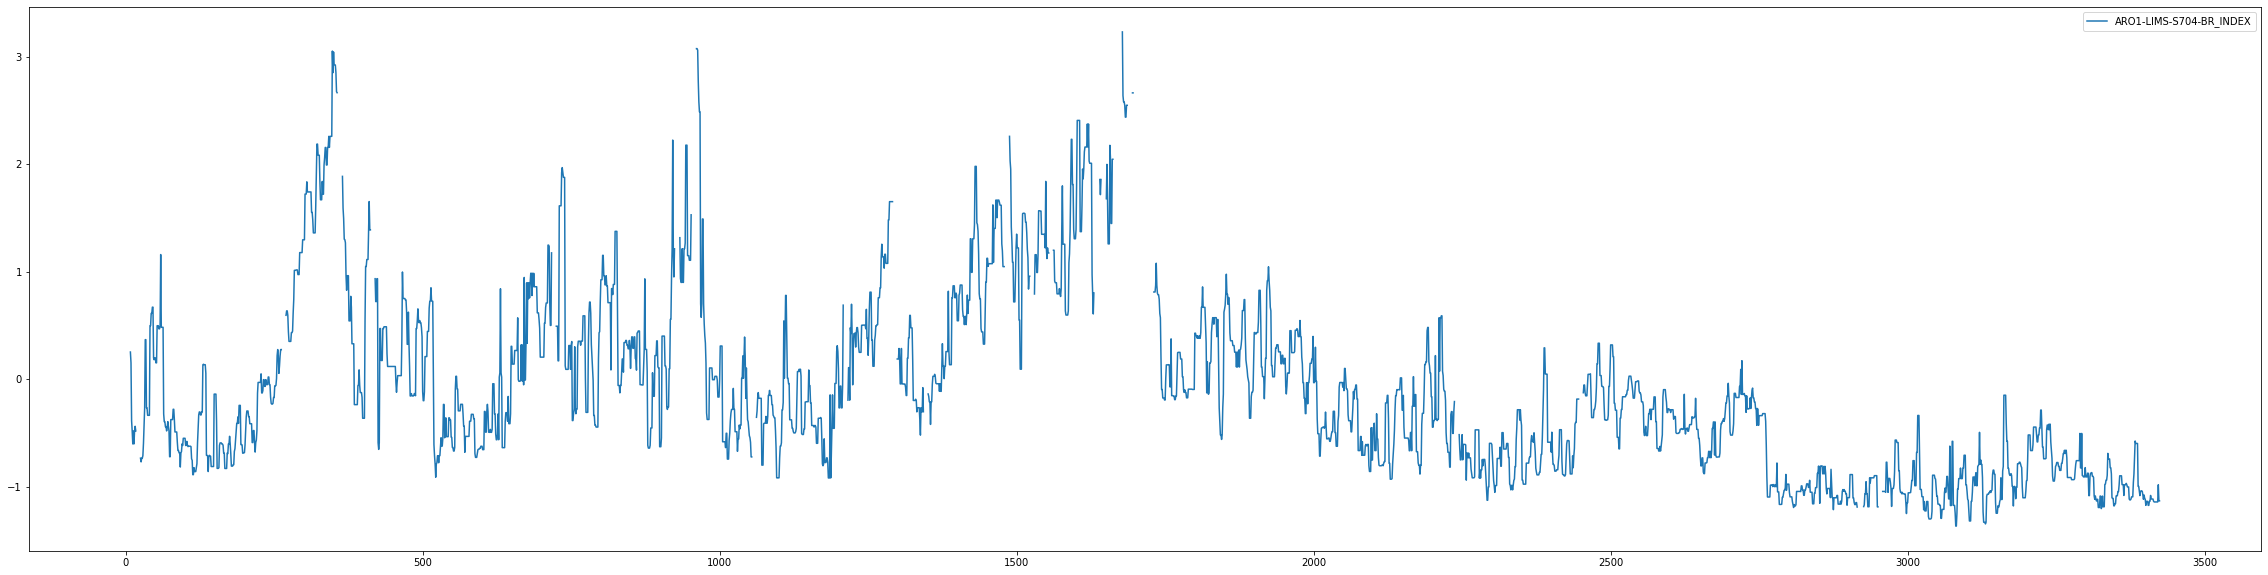

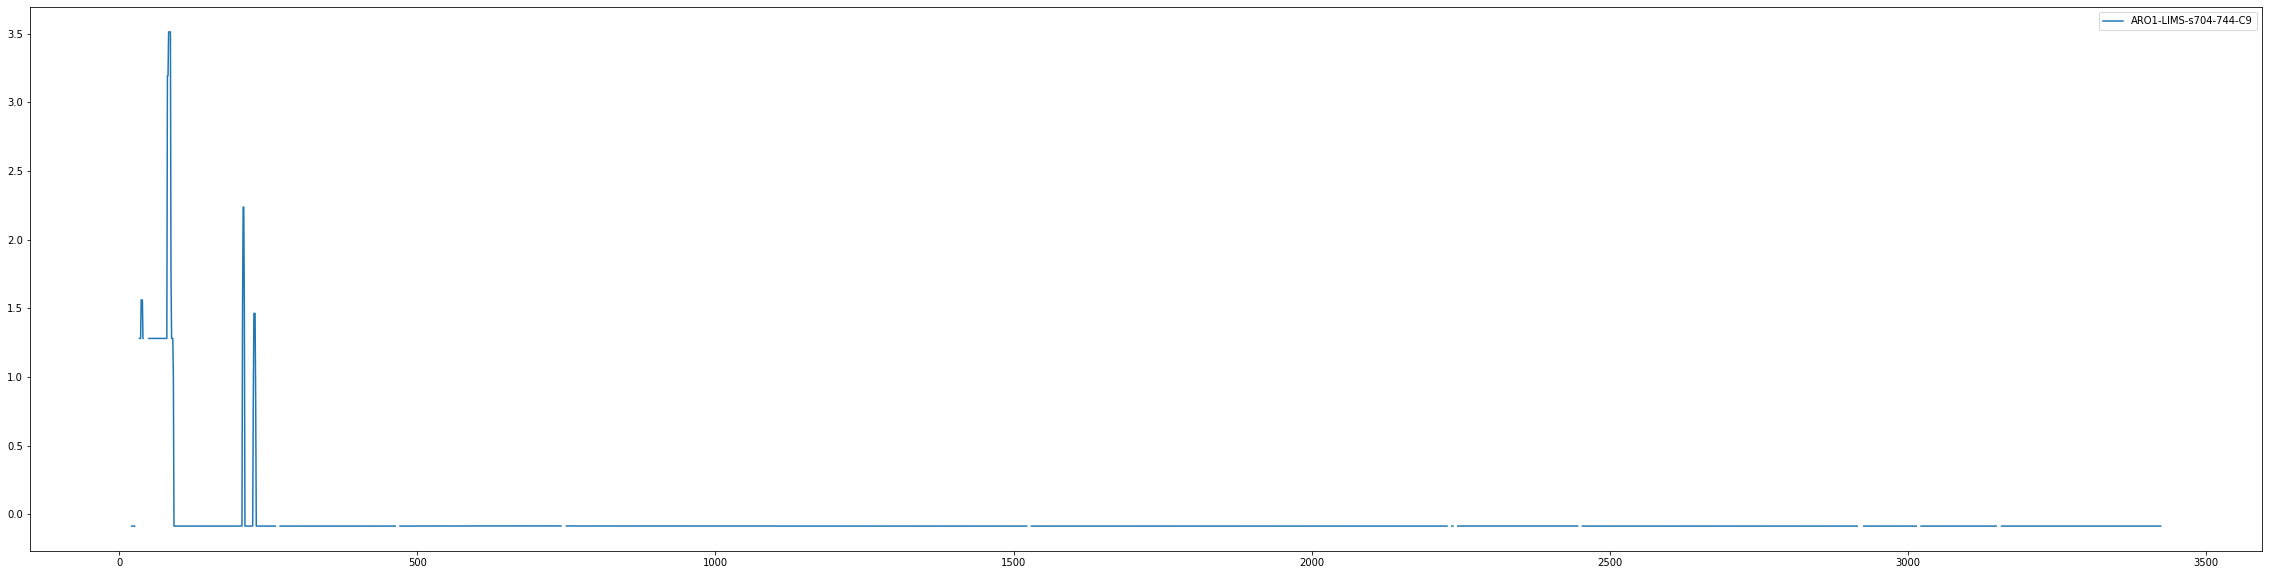

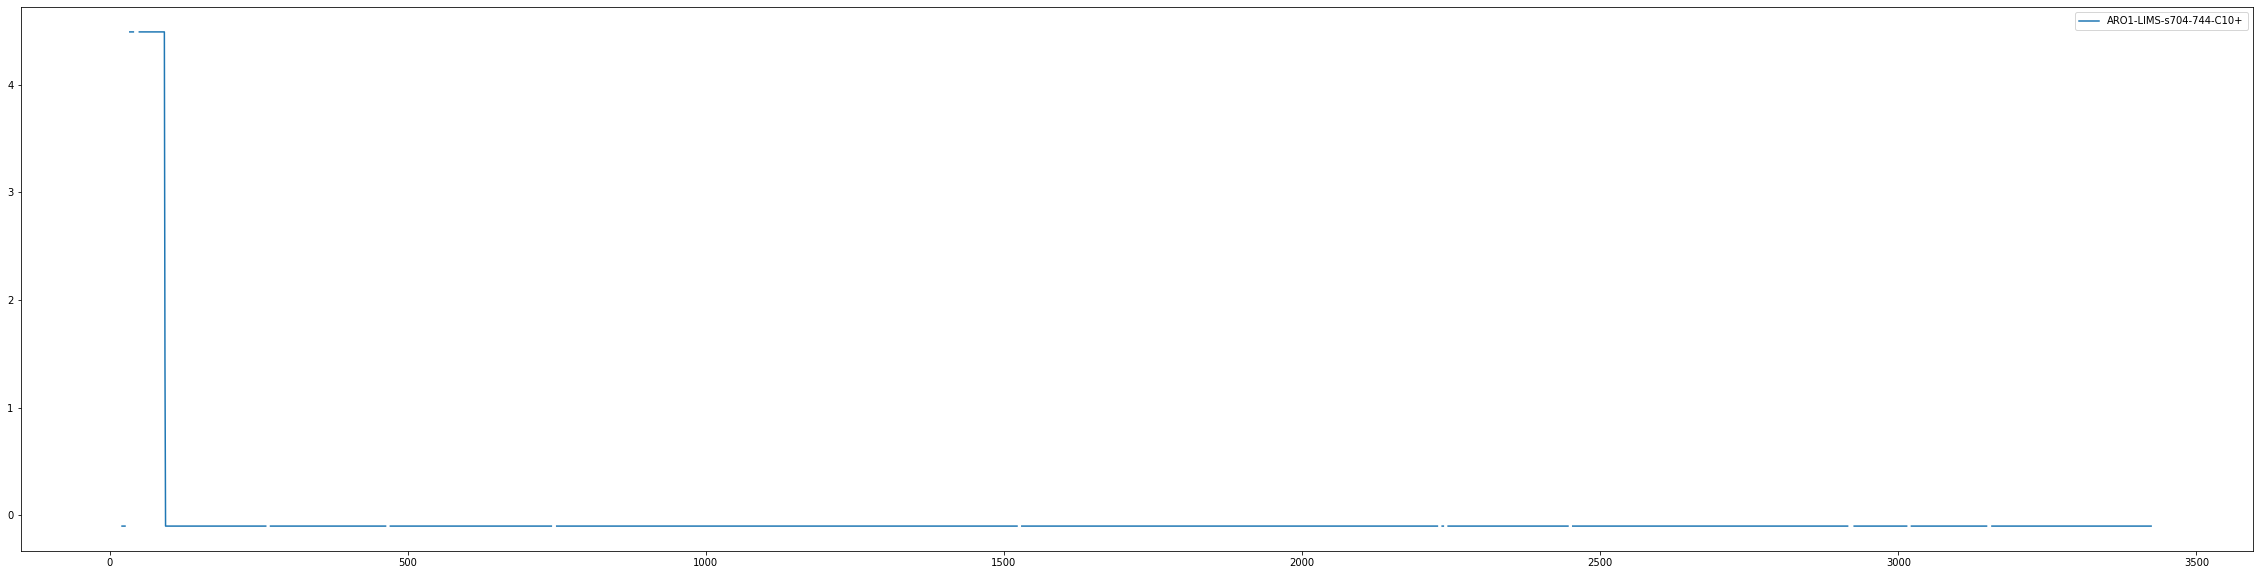

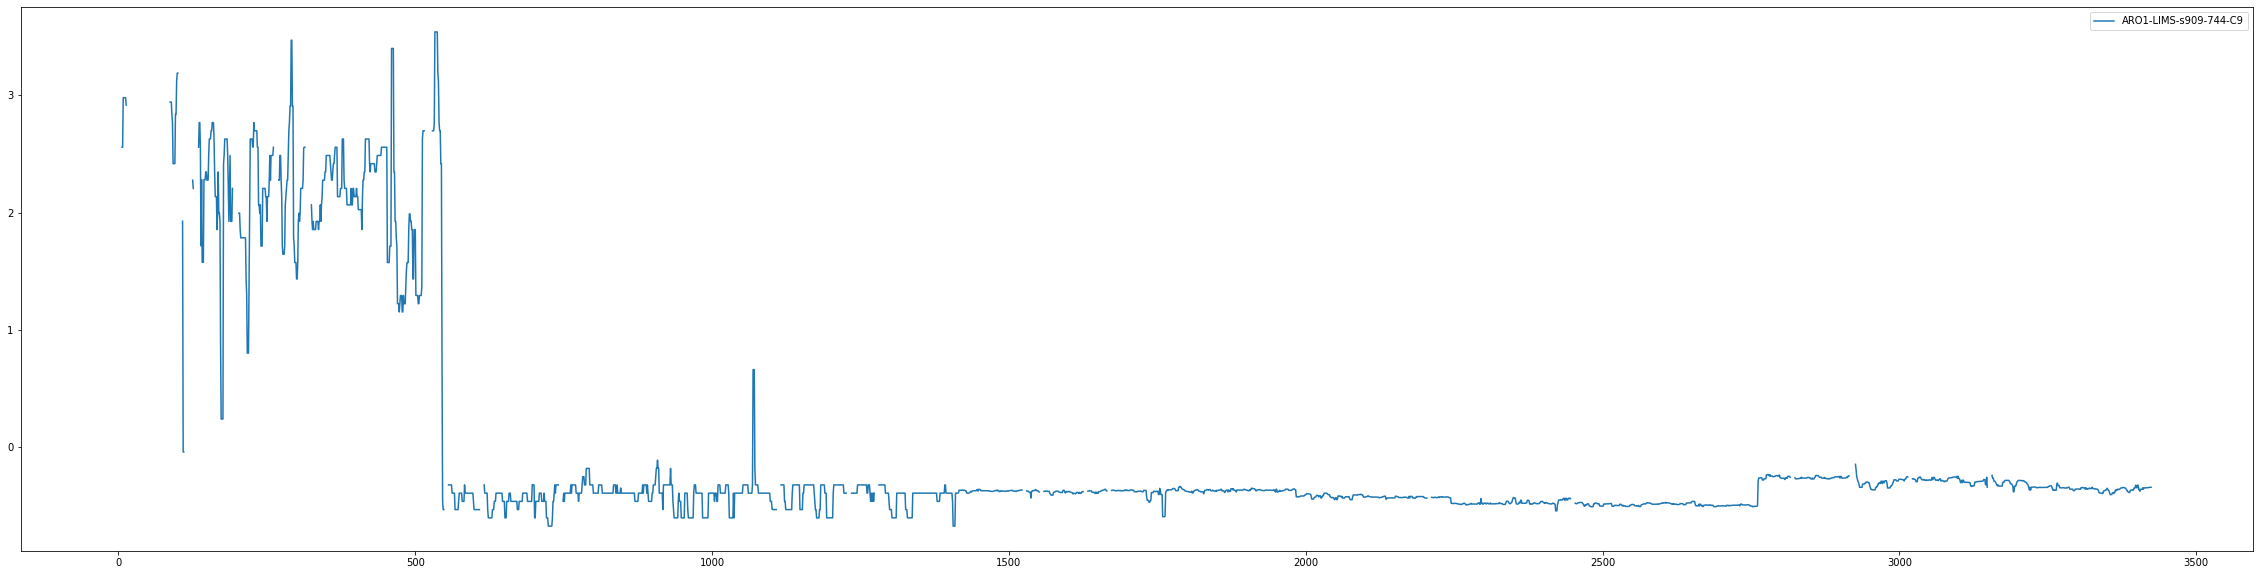

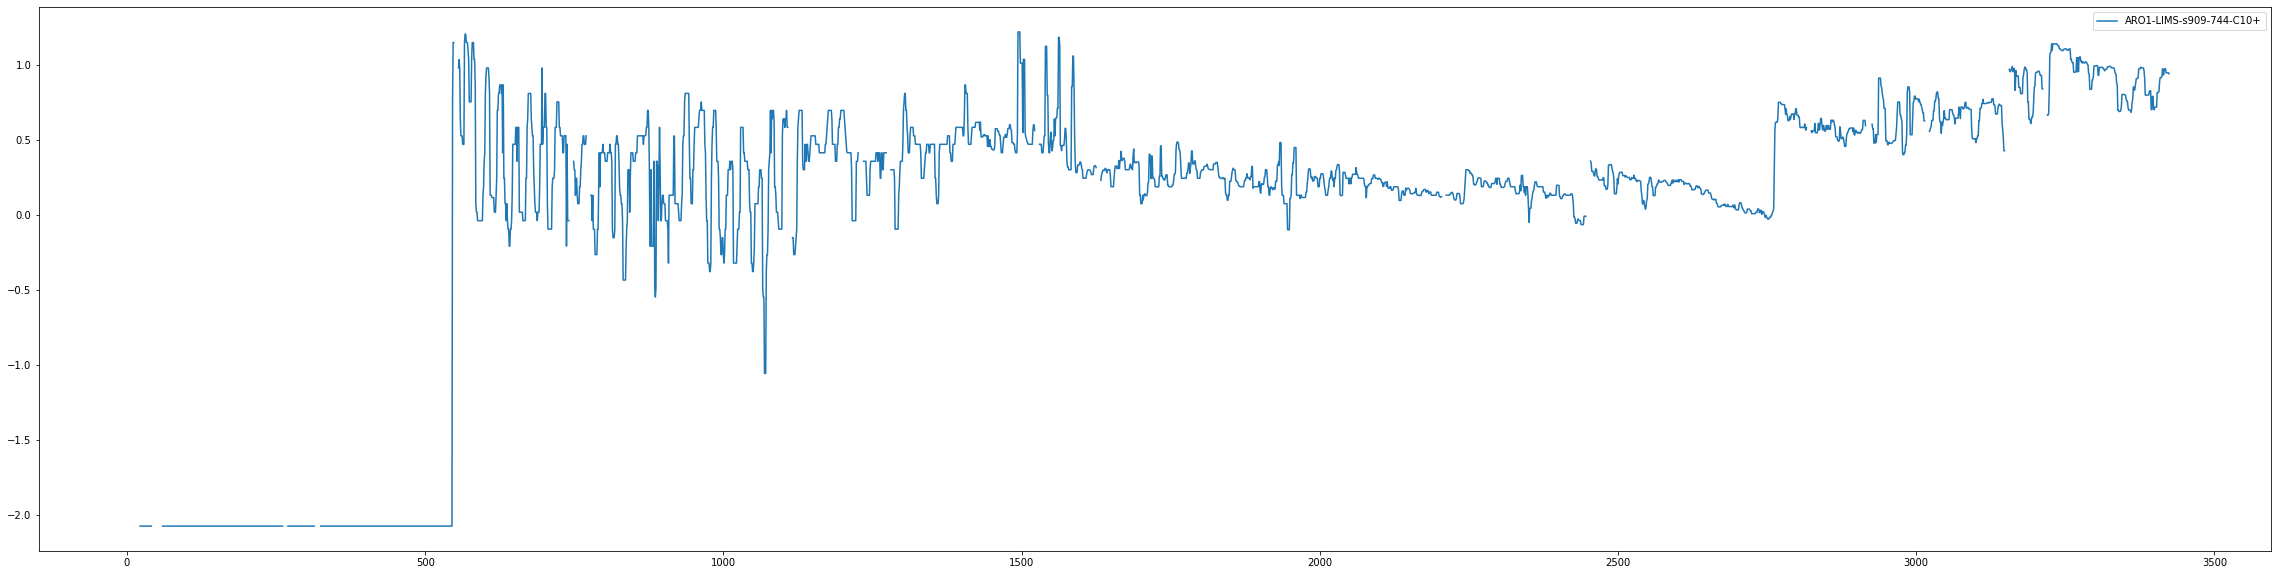

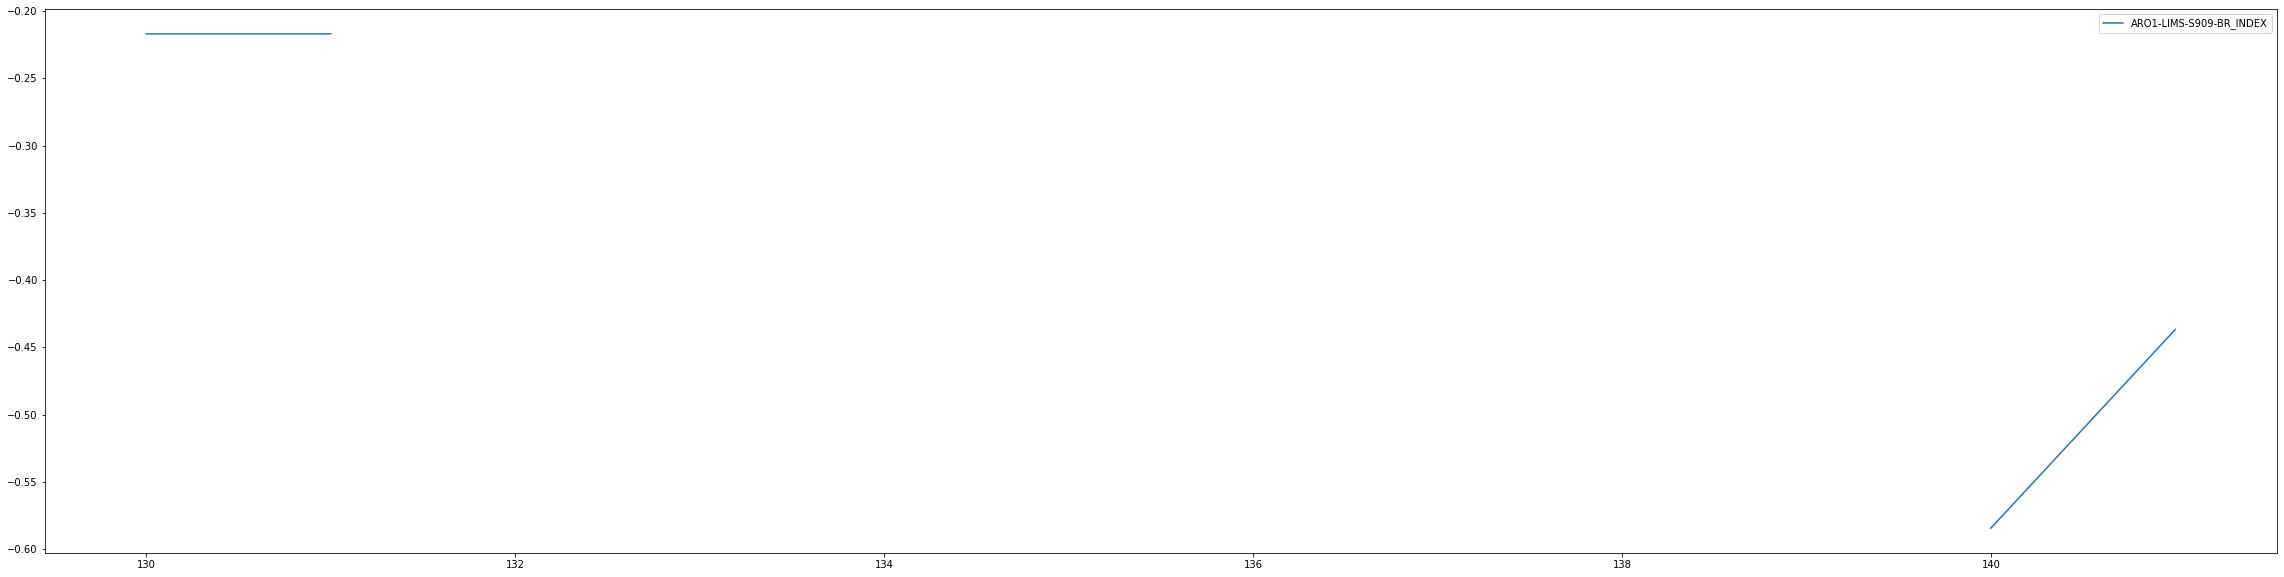

In [129]:
ss = StandardScaler()
ARO1_df[:] = ss.fit_transform(ARO1_df)
ARO1_df.corr()

n = 7
for i in ARO1_df.columns:
  fig = plt.figure(figsize=(40,10))
  plt.plot(ARO1_df[i].rolling(n).median(),label=i)
  plt.legend()
  plt.show()

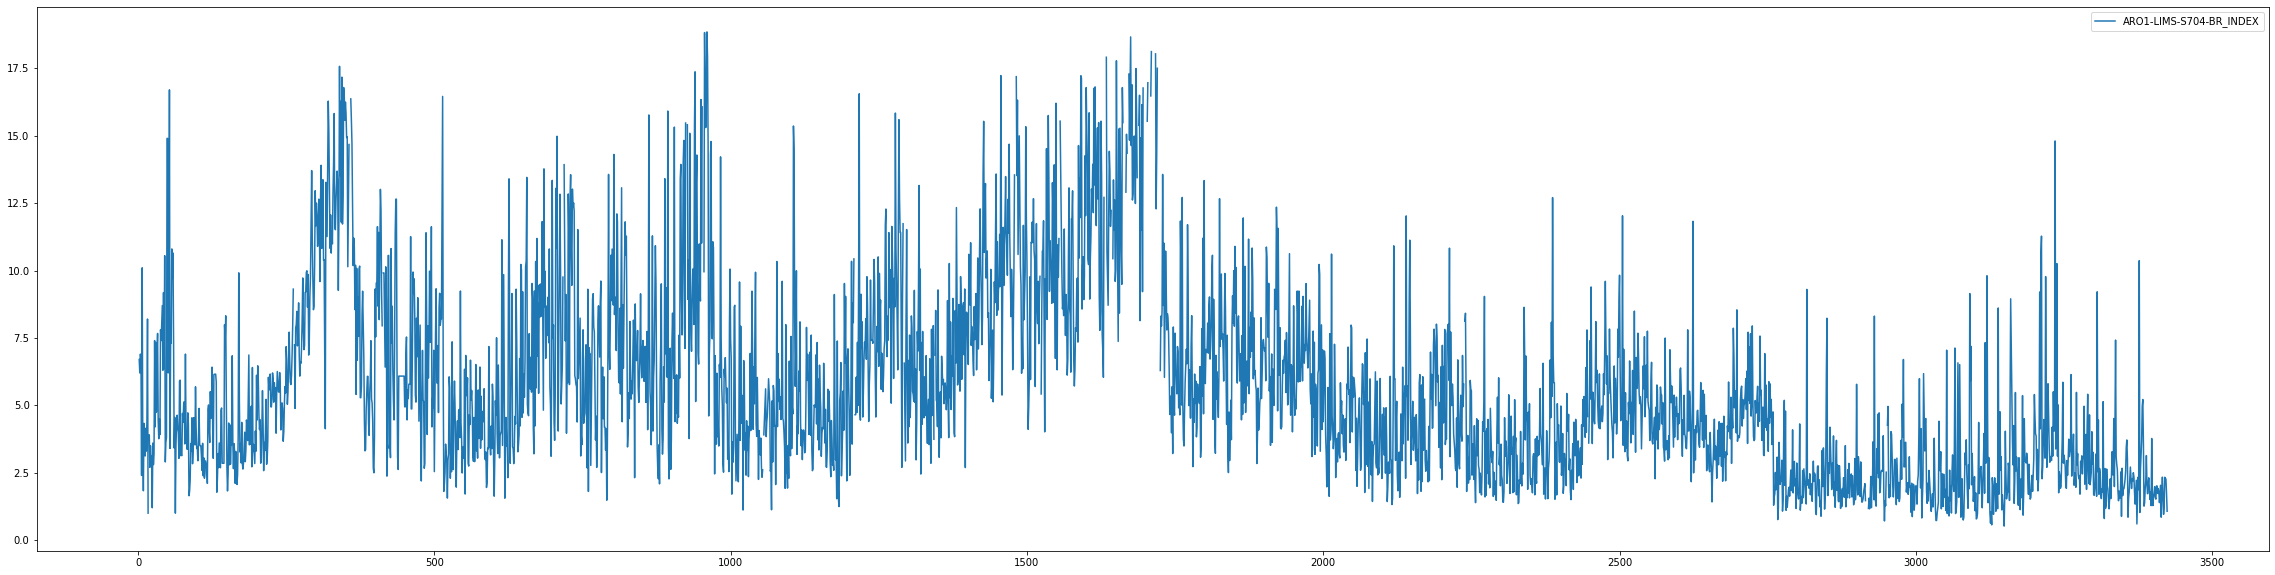

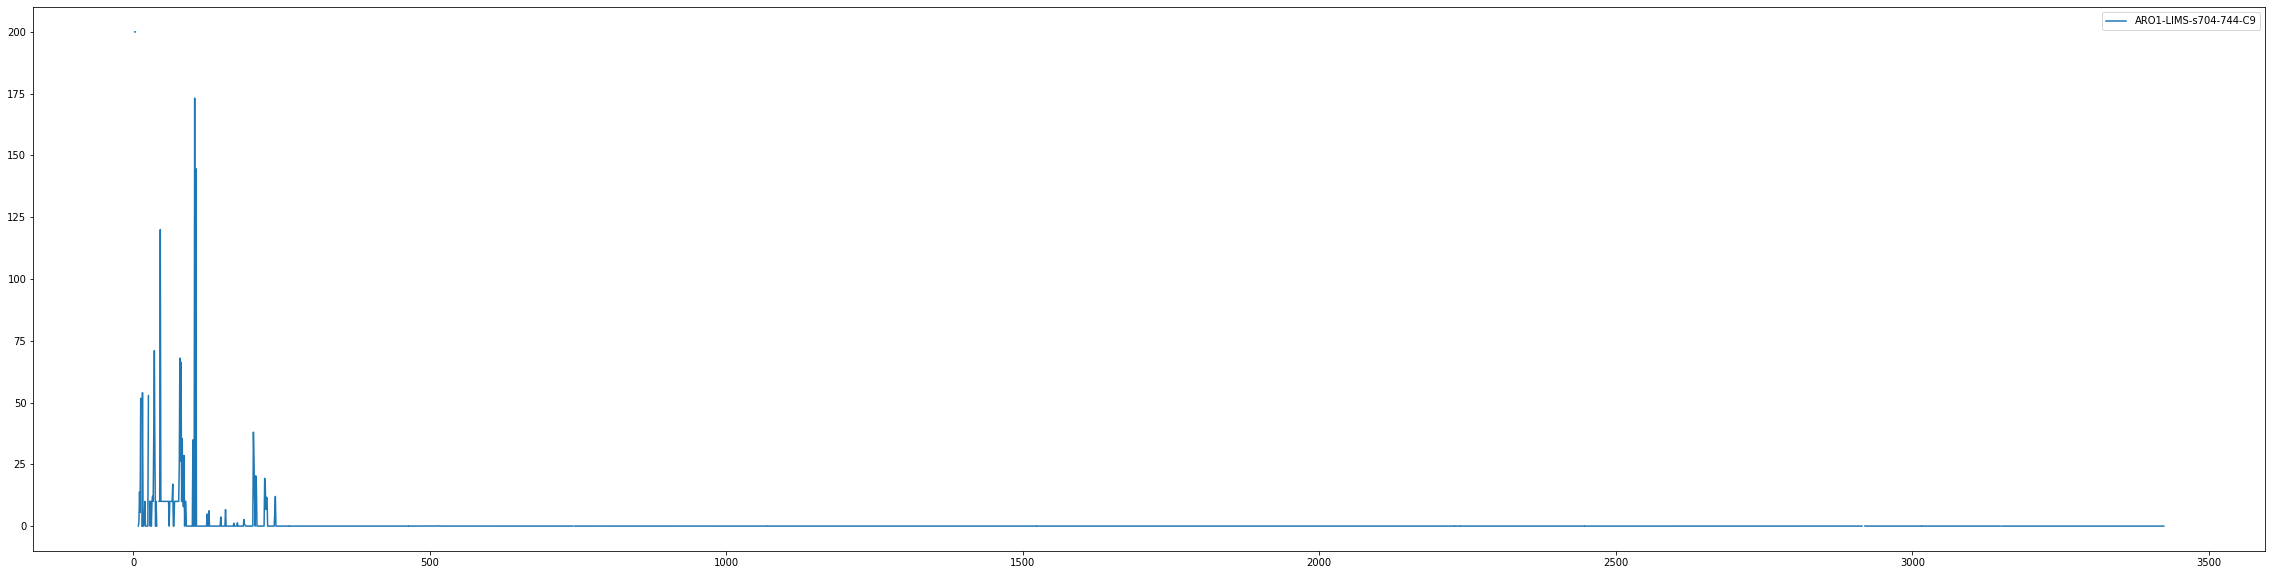

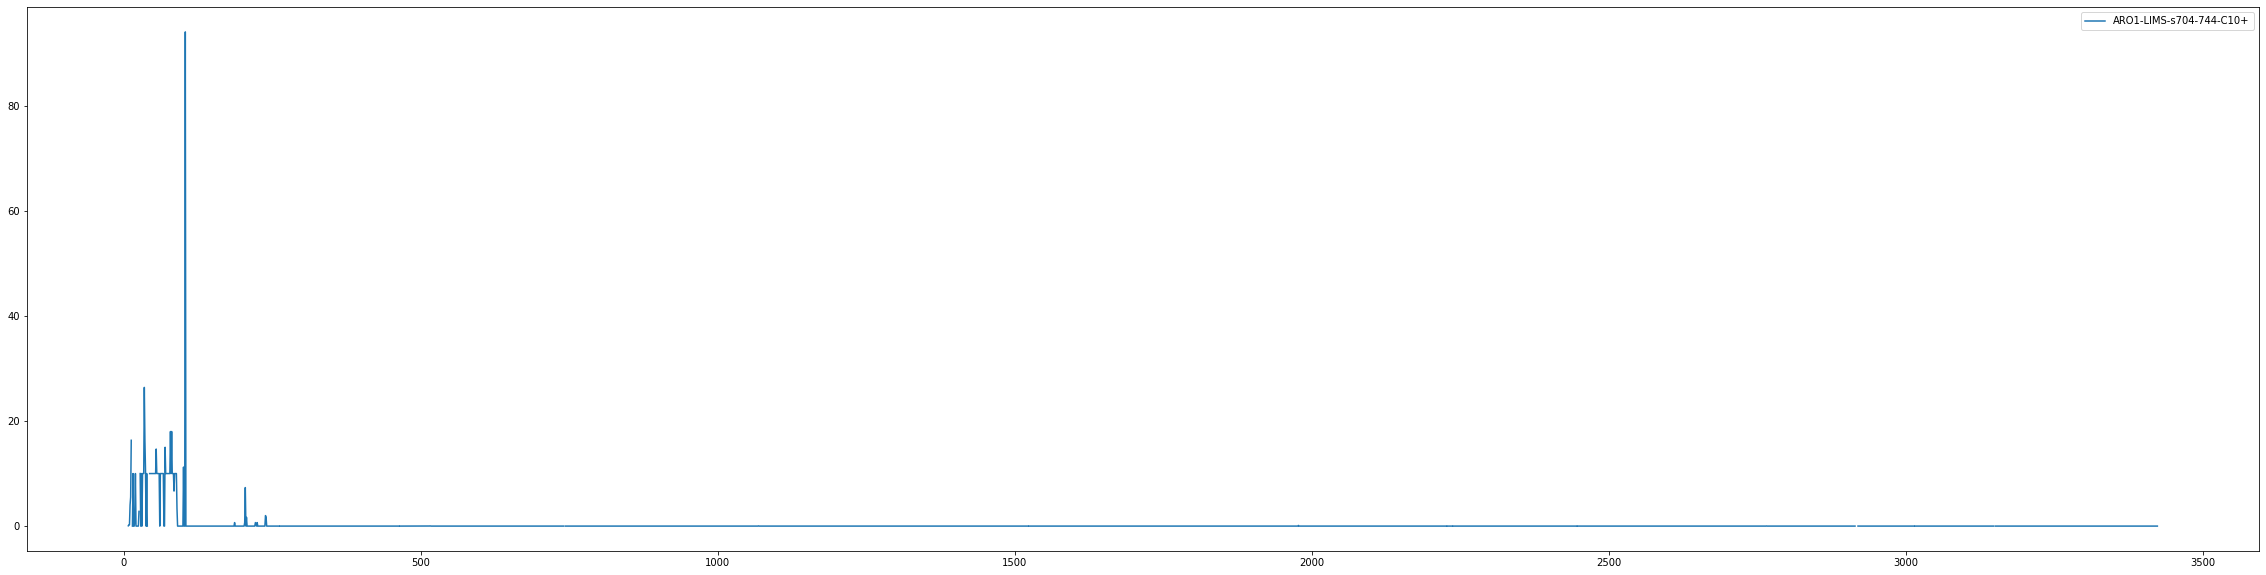

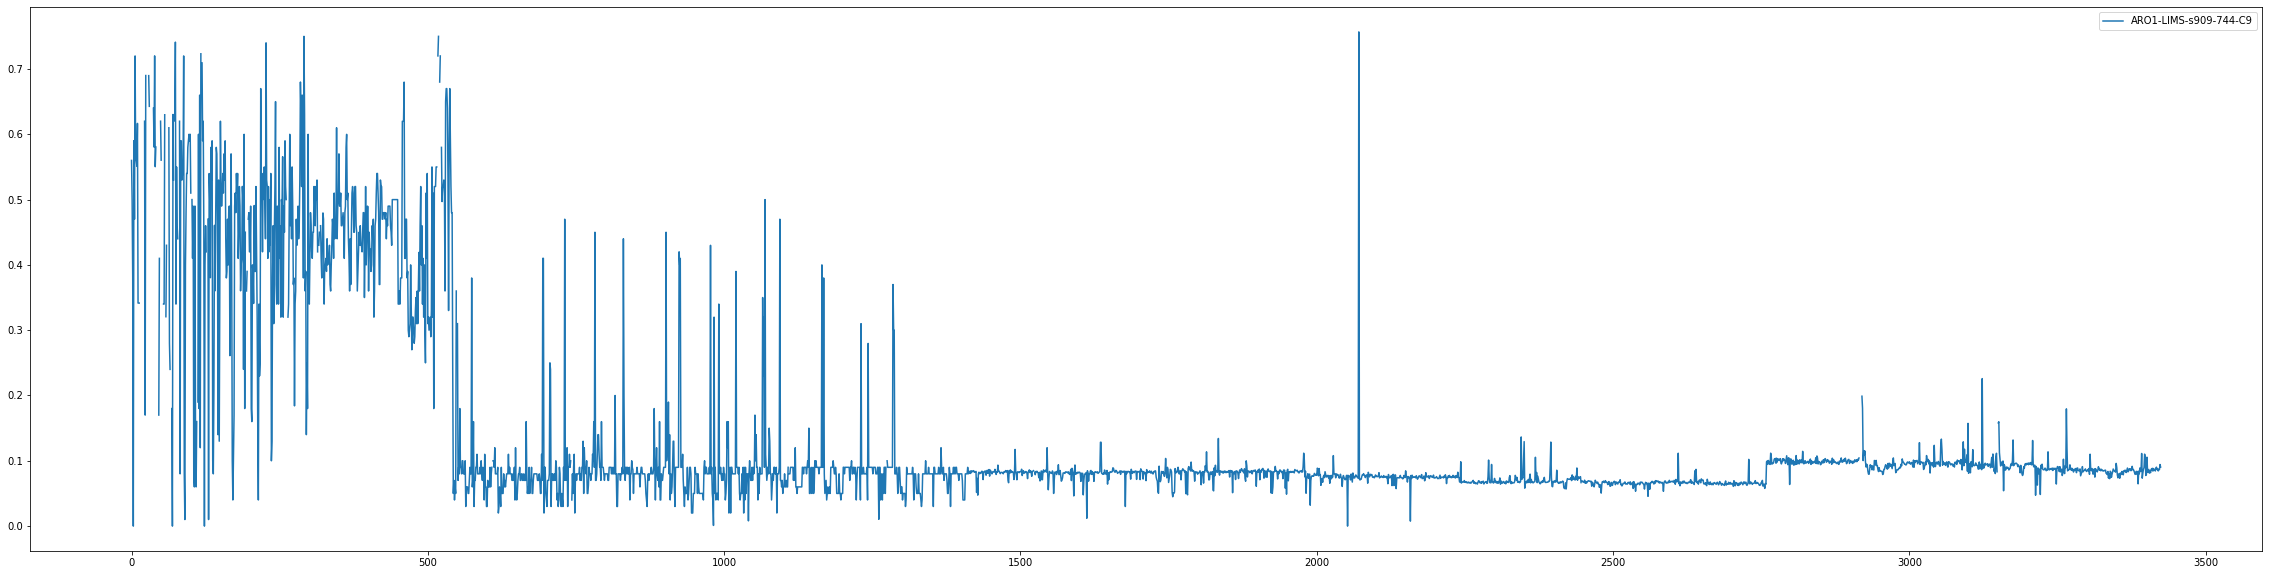

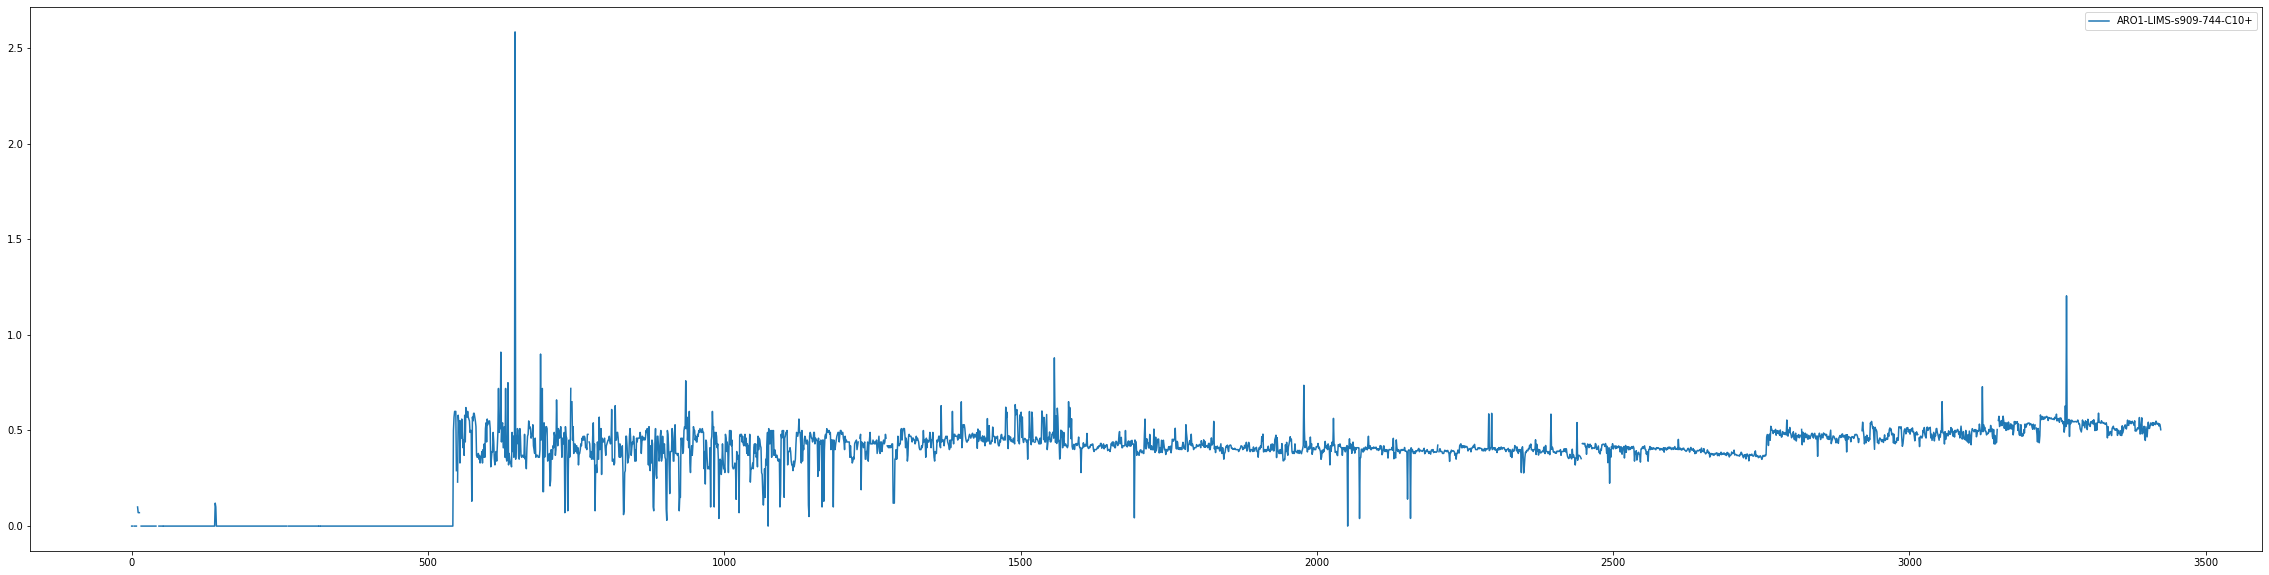

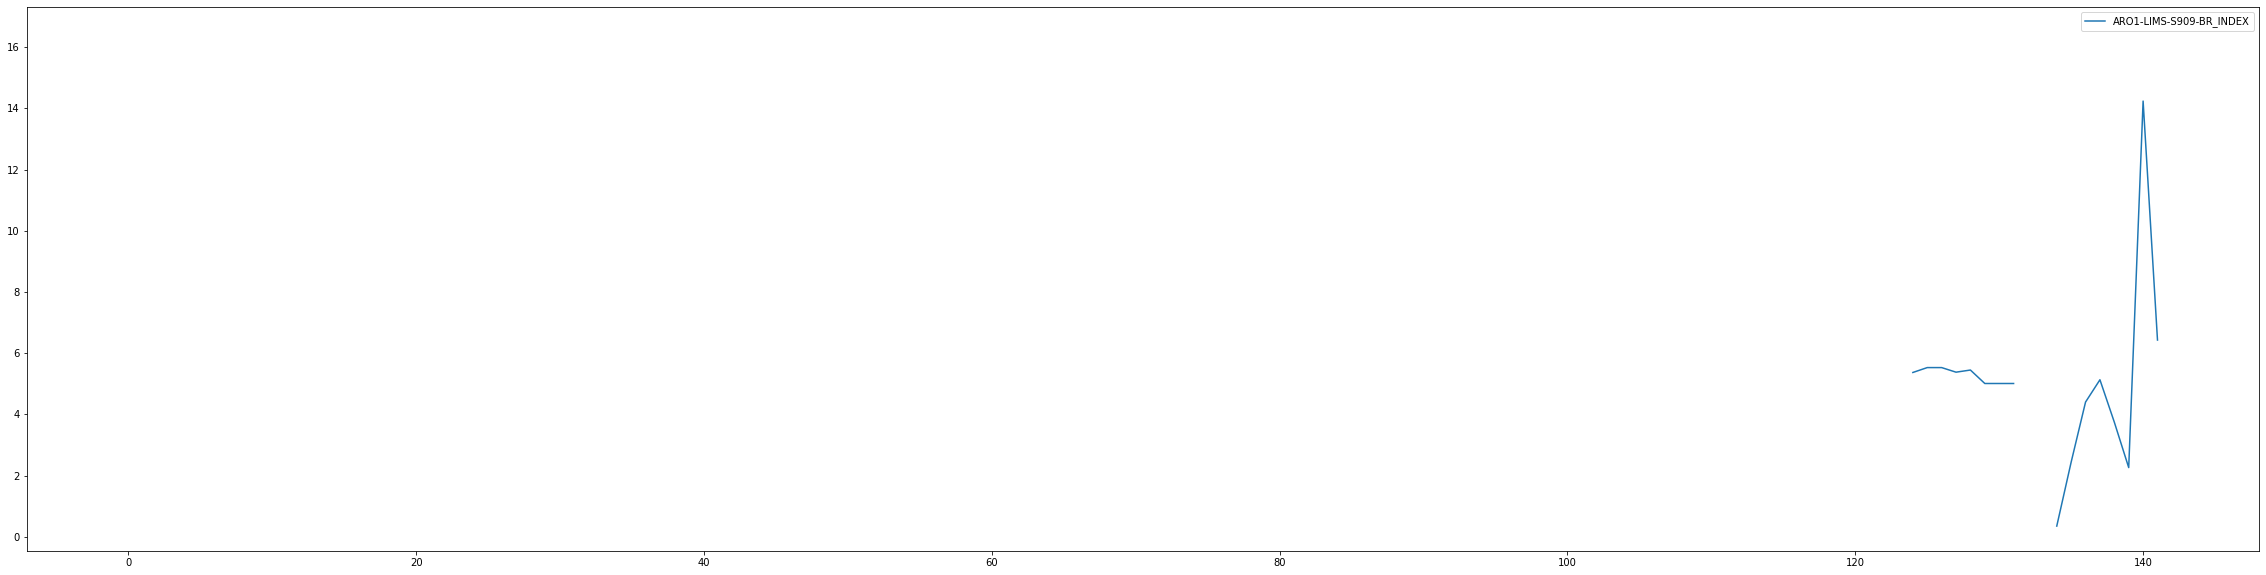

In [132]:
for i in ARO1_df.columns:
  fig = plt.figure(figsize=(40,10))
  plt.plot(ARO1_df[i],label=i)
  plt.legend()
  plt.show()

In [133]:
ARO3_df = pd.read_excel('data/ADS27/3R91113R9121_R1-ARO3.xlsx', sheet_name='R911R912_TAG相關錶點資料(X)')

ARO3_cols = [
             #"date",
             'ARO3-LIMS-3SC71611@Br.Index',
             'ARO3-LIMS-3SC71611@A9',
             'ARO3-LIMS-3SC71611@A10+',
             'ARO3-LIMS-3SC97311@A9',
             'ARO3-LIMS-3SC97311@A10+'
             ]

#ARO3_df.columns.values[0] = "date"
ARO3_df = ARO3_df.loc[:,ARO3_cols]
for i in ARO3_df.columns:
    ARO3_df[i] = pd.to_numeric(ARO3_df[i],errors='coerce')
    ARO3_df[i] = remove_outlier(df = ARO3_df, column = i)

ARO3_df

ARO3-LIMS-3SC71611@Br.Index  ARO3-LIMS-3SC71611@A9  \
0                              9.5                  0.000   
1                              9.5                  0.000   
2                              9.5                  0.000   
3                              9.5                  0.000   
4                              9.5                  0.000   
...                            ...                    ...   
32852                         18.4                  0.002   
32853                         18.4                  0.002   
32854                         18.4                  0.002   
32855                         18.4                  0.002   
32856                         18.4                  0.002   

       ARO3-LIMS-3SC71611@A10+  ARO3-LIMS-3SC97311@A9  ARO3-LIMS-3SC97311@A10+  
0                          0.0                  133.0                   8415.0  
1                          0.0                  133.0                   8415.0  
2                          0.0                  133.0                   8415.0  
3                          0.0                  133.0                   8415.0  
4                          0.0                  133.0                   8415.0  
...                        ...                    ...                      ...  
32852                      0.0                  165.0                   7344.0  
32853                      0.0                  165.0                   7344.0  
32854                      0.0                  165.0                   7344.0  
32855                      0.0                  165.0                   7344.0  
32856                      0.0                  165.0                   7344.0  

[32857 rows x 5 columns]

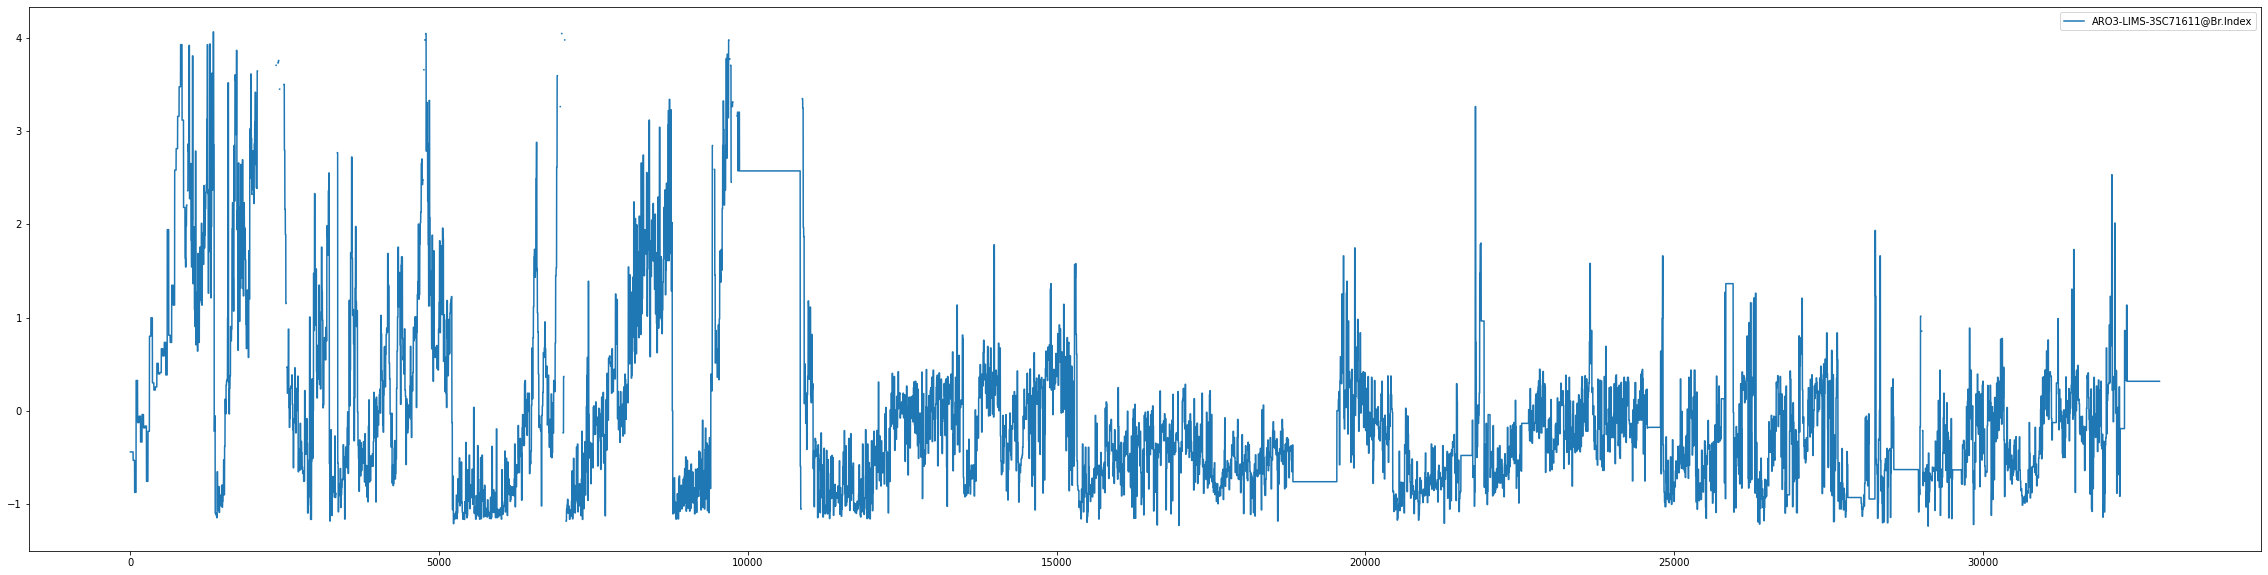

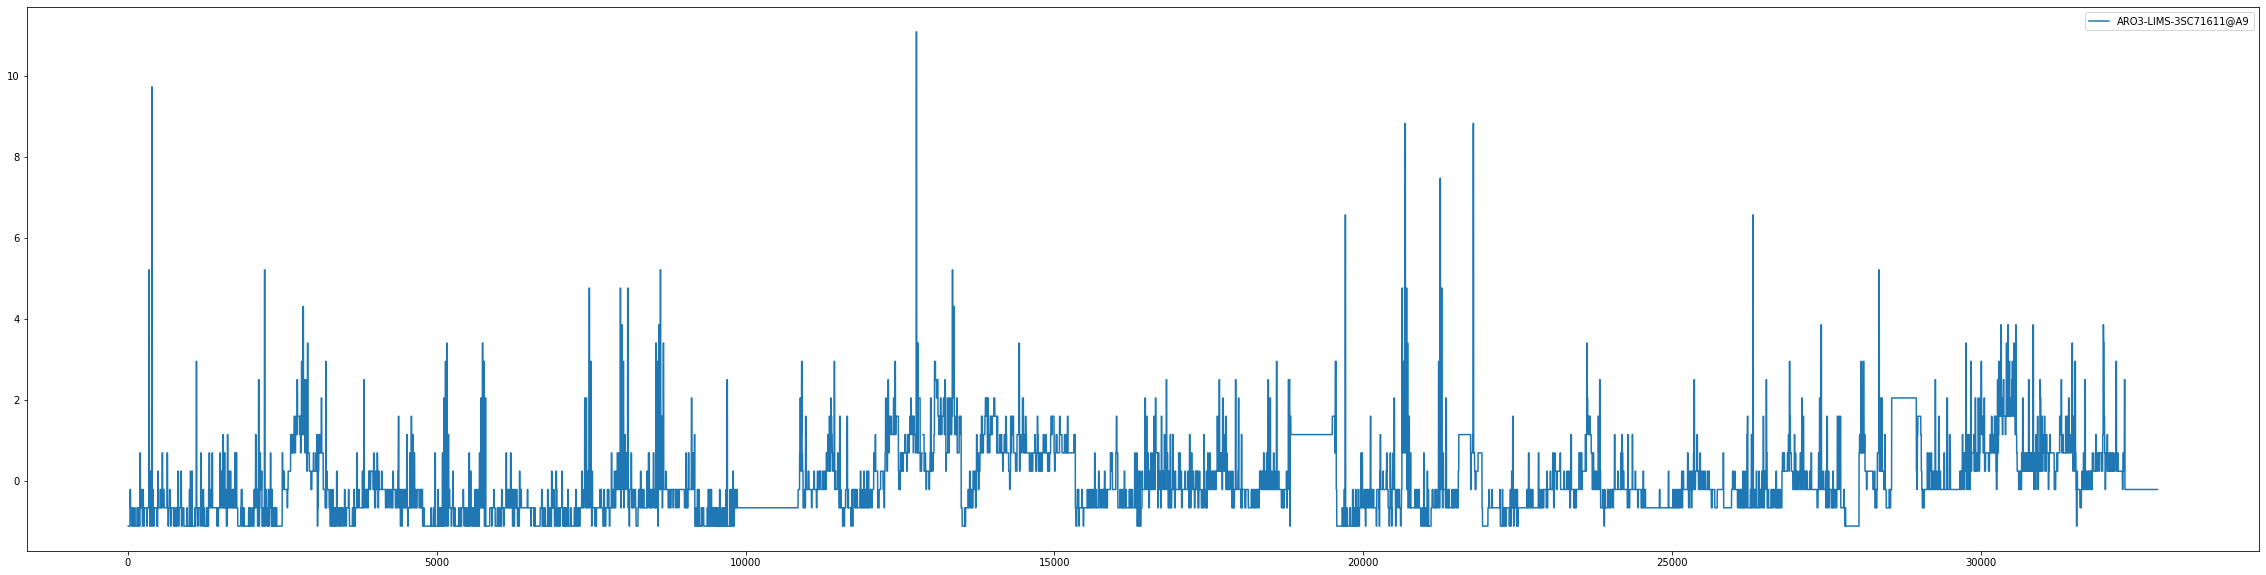

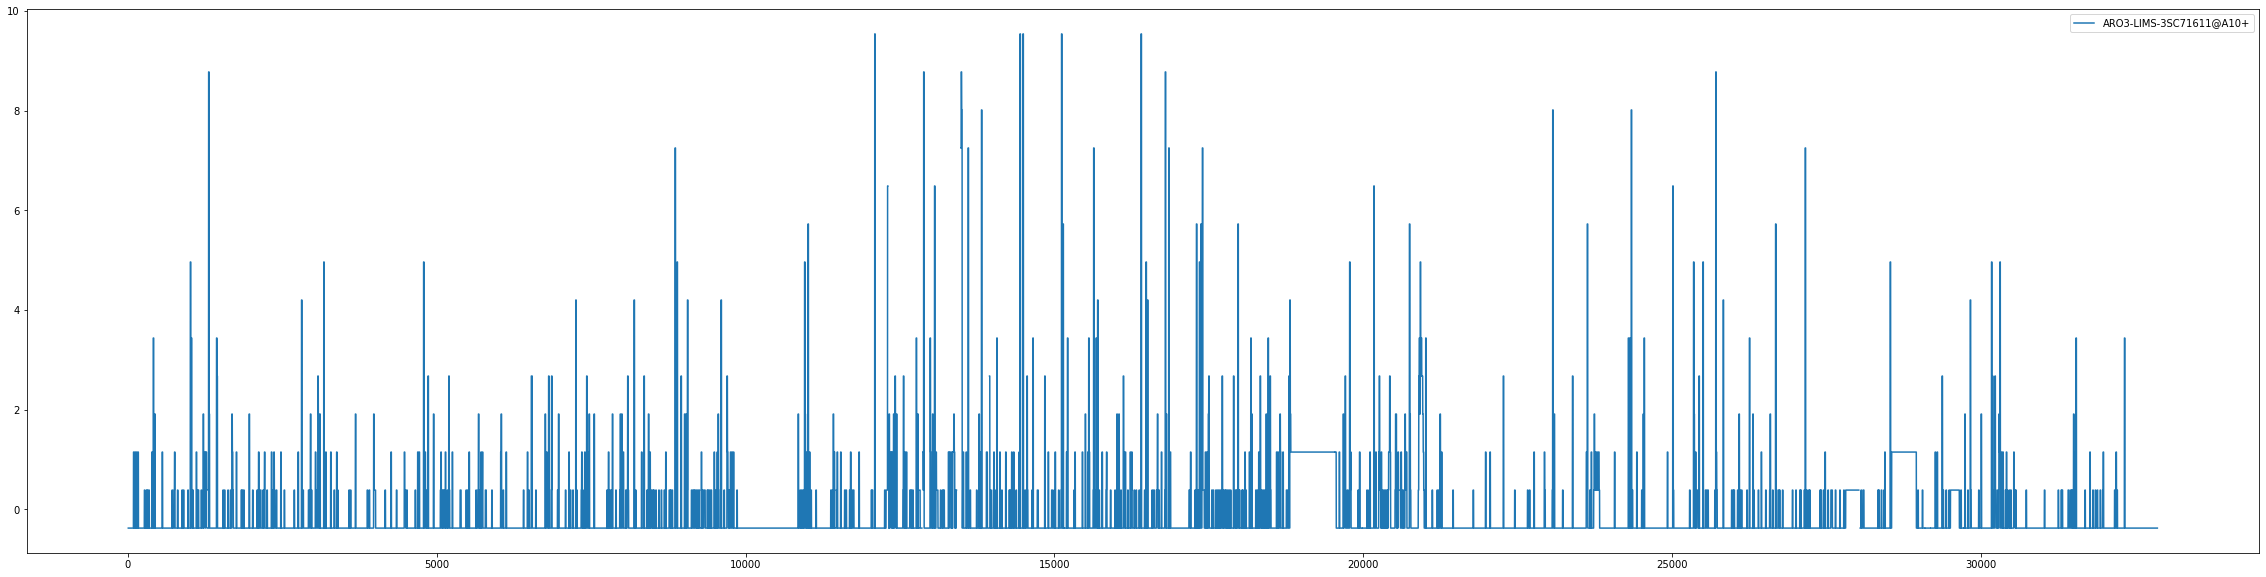

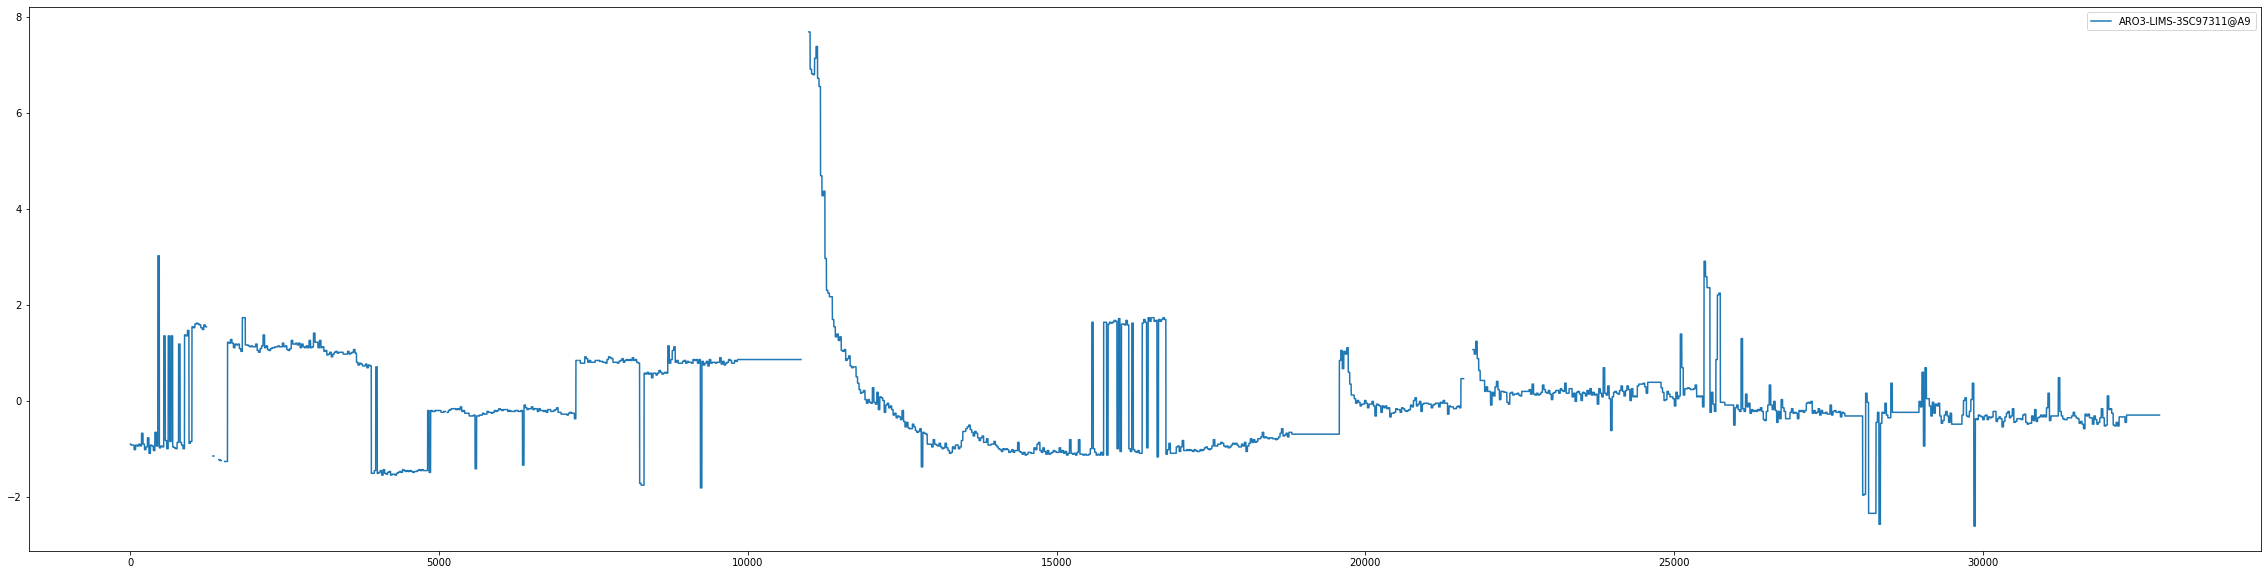

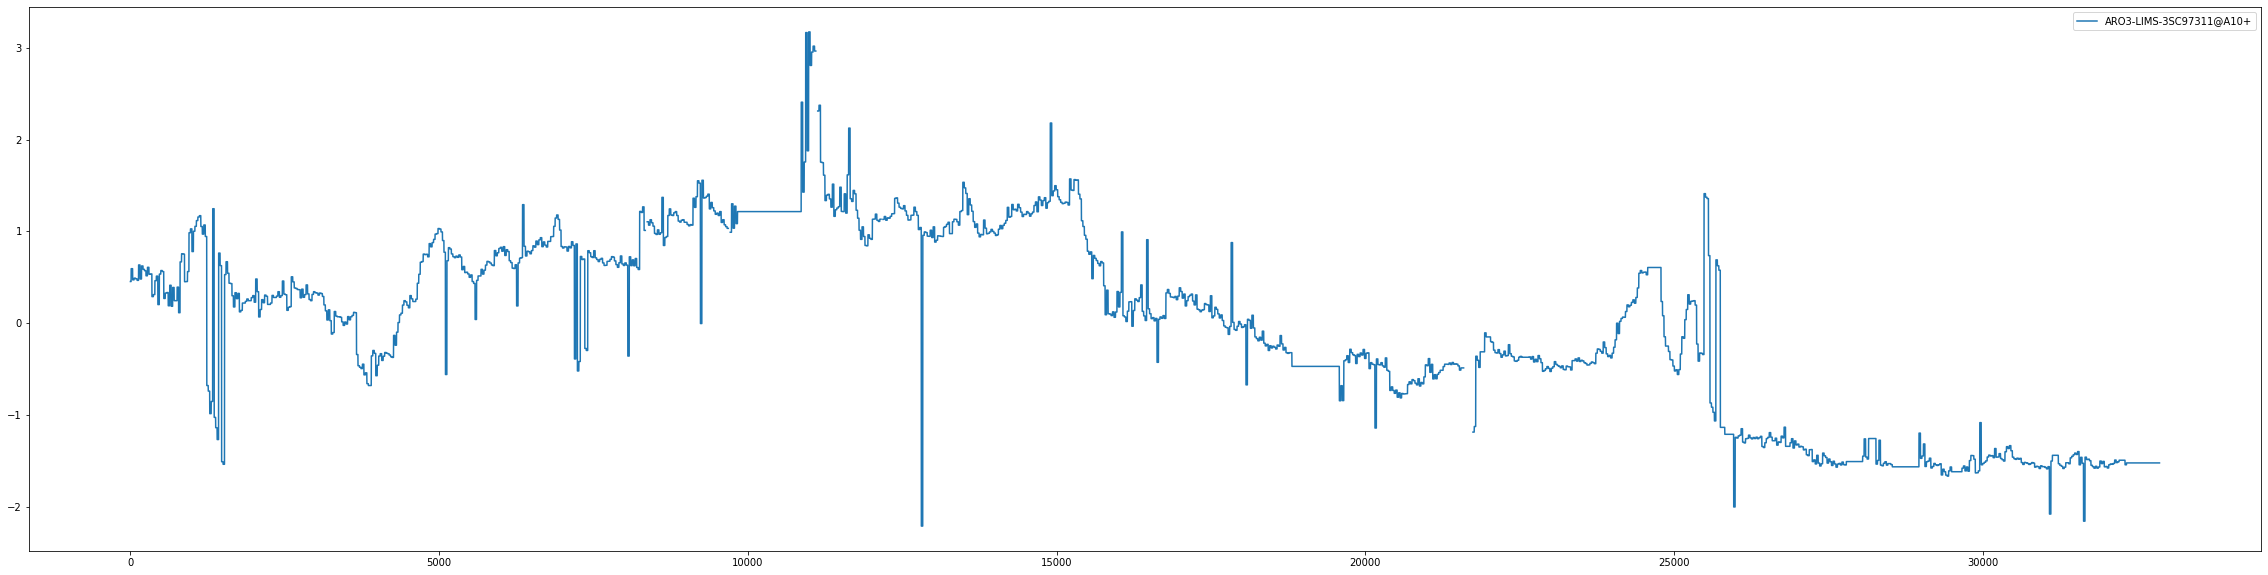

In [135]:
ss = StandardScaler()
ARO3_df[:] = ss.fit_transform(ARO3_df)
ARO3_df.corr()

n = 7
for i in ARO3_df.columns:
  fig = plt.figure(figsize=(40,10))
  plt.plot(ARO3_df[i].rolling(n).median(),label=i)
  plt.legend()
  plt.show()

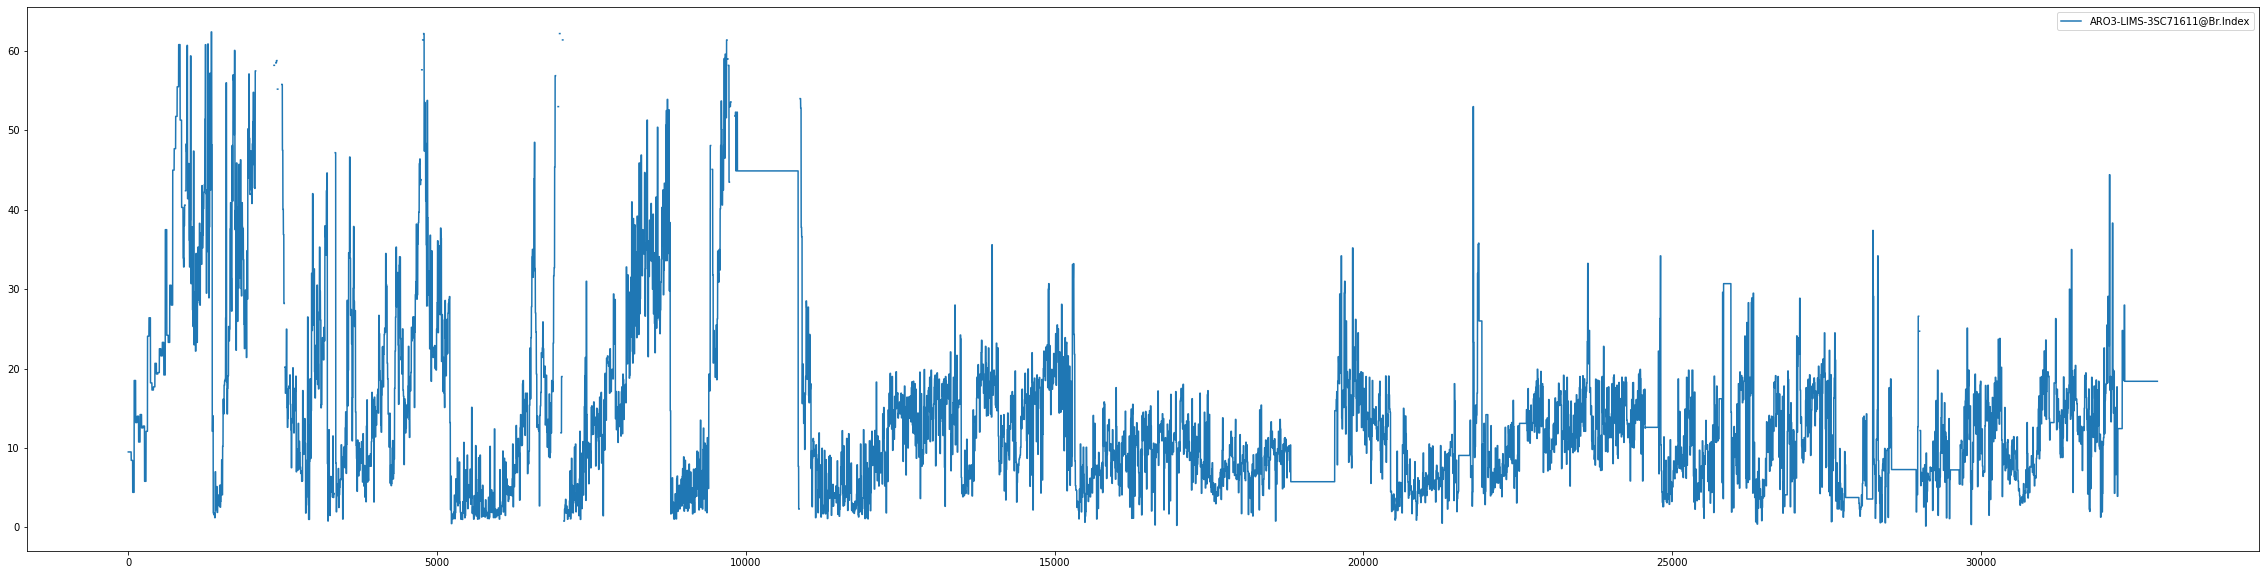

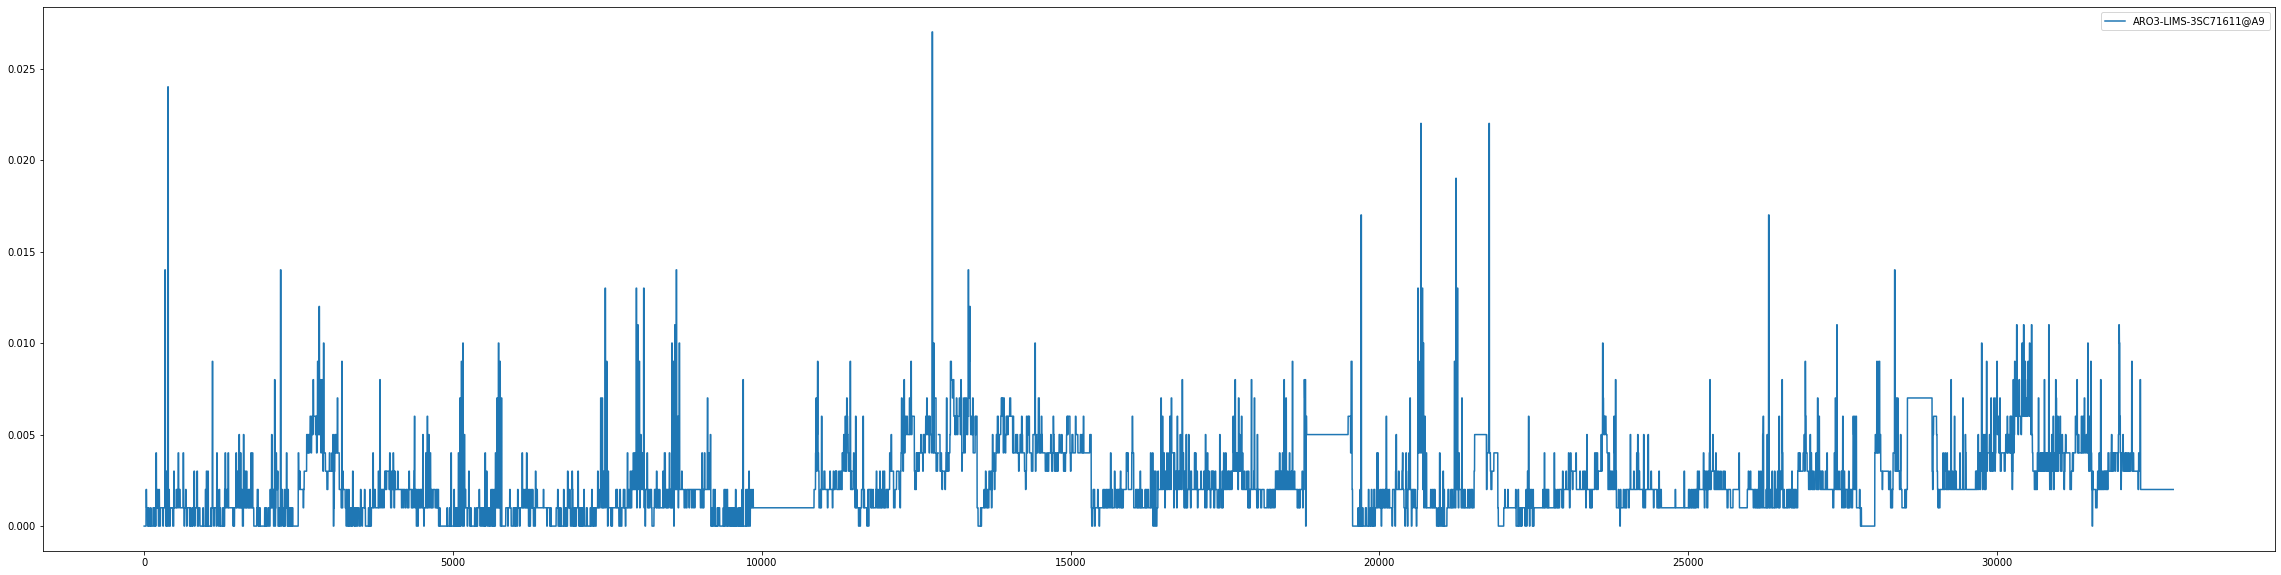

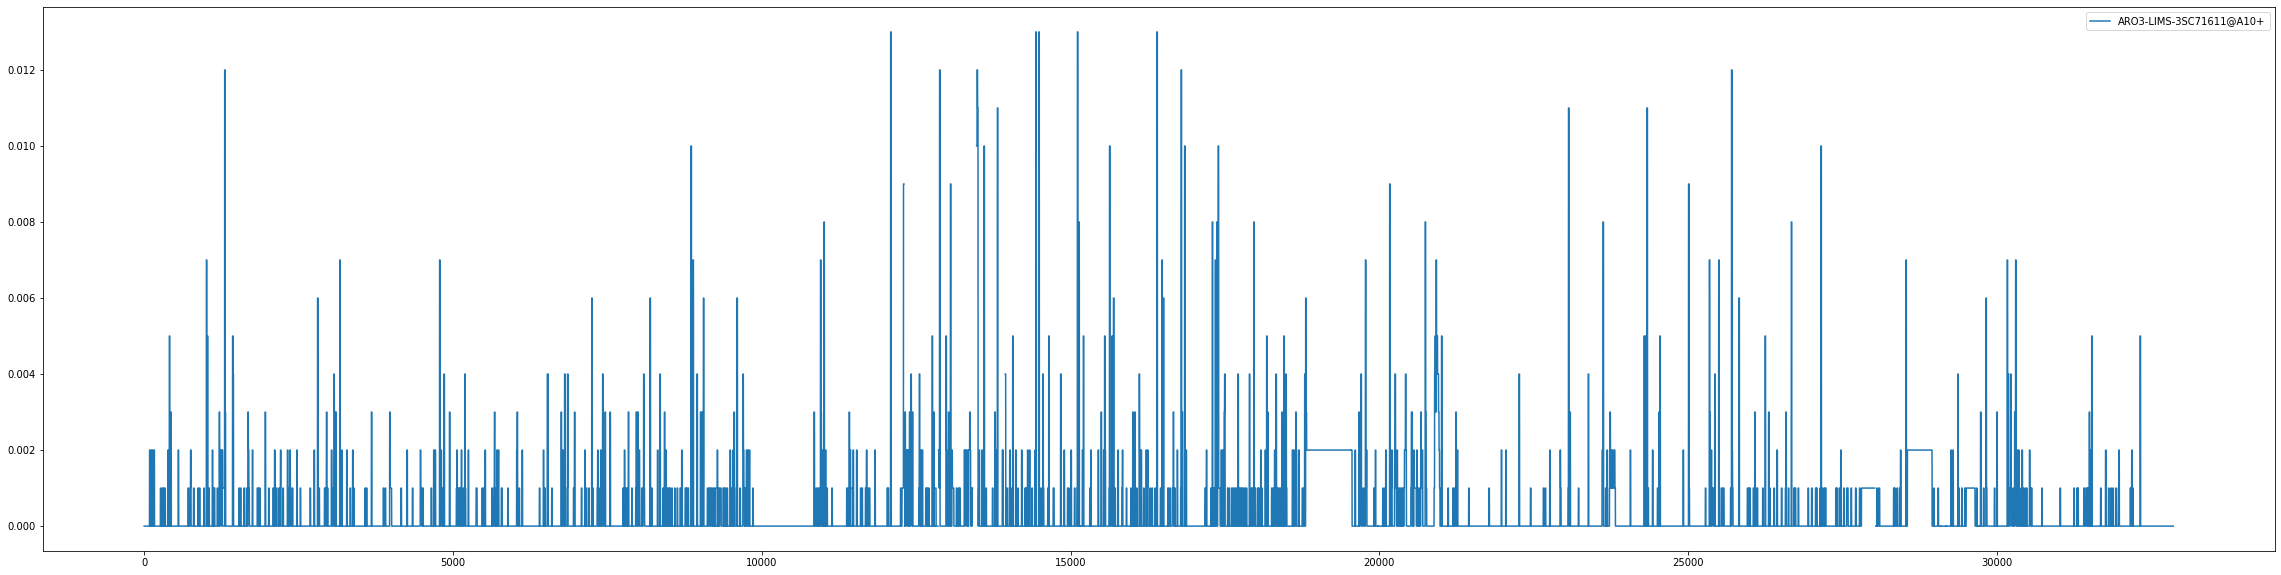

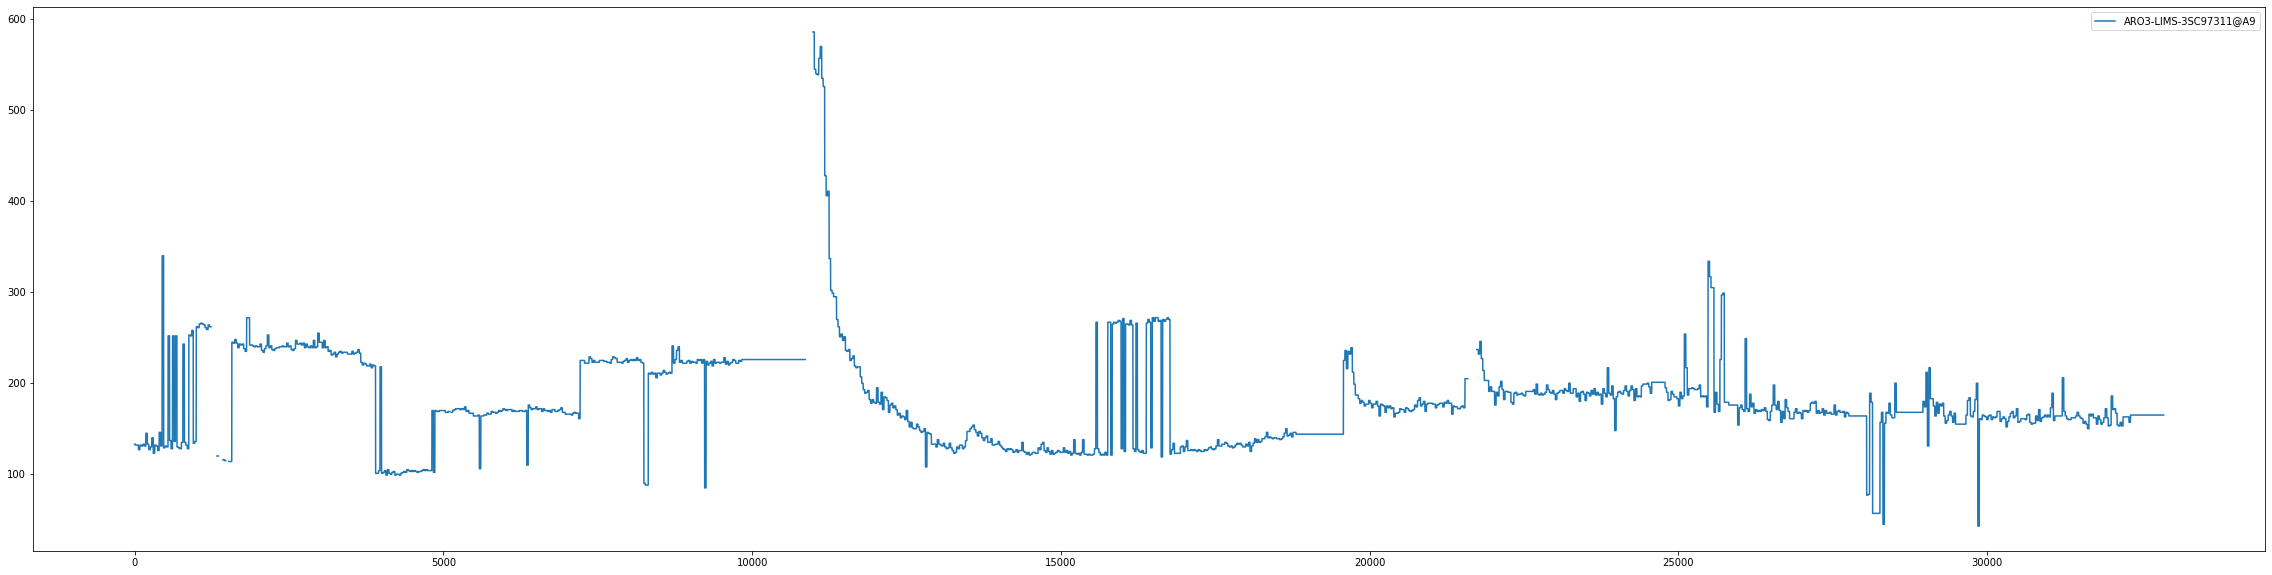

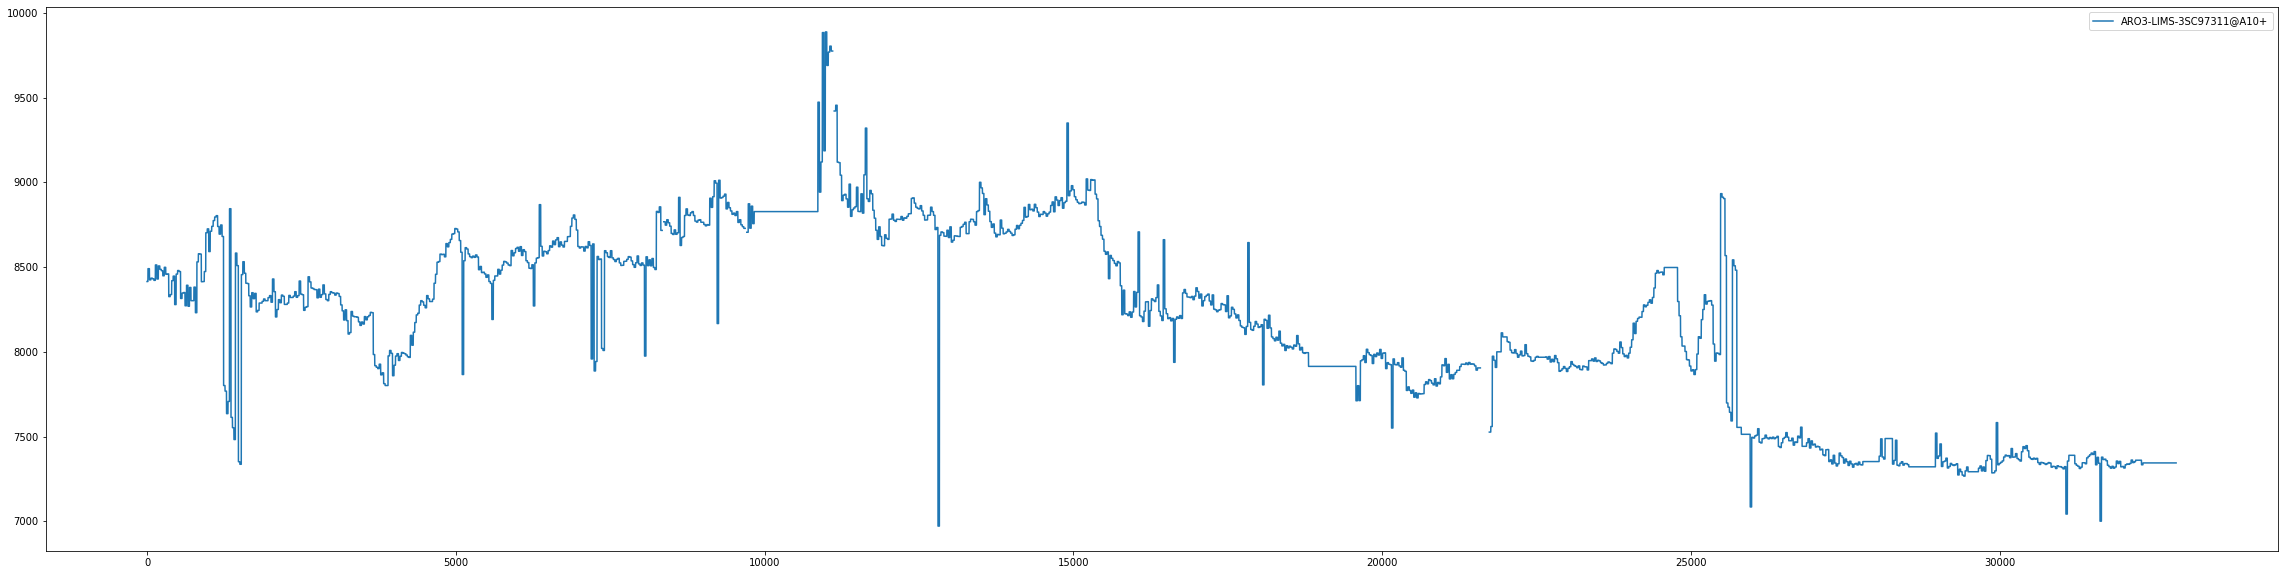

In [134]:
for i in ARO3_df.columns:
  fig = plt.figure(figsize=(40,10))
  plt.plot(ARO3_df[i], label=i)
  plt.legend()
  plt.show()

<font size = 5>ADS47</font>

In [137]:
ARO1_df = pd.read_excel('data/ADS47/R911R912 _ARO1 - R3.xlsx', sheet_name='R911R912_TAG相關錶點資料(X)')

ARO1_cols = [
             #"date",
             'ARO1-LIMS-S704-BR_INDEX',
             'ARO1-LIMS-s704-744-C9',
             'ARO1-LIMS-s704-744-C10+',
             'ARO1-LIMS-s909-744-C9',
             'ARO1-LIMS-s909-744-C10+',
             'ARO1-LIMS-S909-BR_INDEX',
             ]

#ARO1_df.columns.values[0] = "date"

ARO1_df = ARO1_df.loc[:,ARO1_cols]
for i in ARO1_df.columns:
    ARO1_df[i] = pd.to_numeric(ARO1_df[i],errors='coerce')
    ARO1_df[i] = remove_outlier(df = ARO1_df, column = i)

ARO1_df

ARO1-LIMS-S704-BR_INDEX  ARO1-LIMS-s704-744-C9  \
0                          NaN                    NaN   
1                          NaN                    NaN   
2                          NaN                    NaN   
3                          NaN                    NaN   
4                          NaN                    NaN   
...                        ...                    ...   
71443                      NaN                    NaN   
71444                      NaN                    NaN   
71445                      NaN                    NaN   
71446                      NaN                    NaN   
71447                     0.94                   67.0   

       ARO1-LIMS-s704-744-C10+  ARO1-LIMS-s909-744-C9  \
0                          NaN                    NaN   
1                          NaN                    NaN   
2                          NaN                    NaN   
3                          NaN                    NaN   
4                          NaN                    NaN   
...                        ...                    ...   
71443                      NaN                    NaN   
71444                      NaN                    NaN   
71445                      NaN                    NaN   
71446                      NaN                    NaN   
71447                      0.0                    NaN   

       ARO1-LIMS-s909-744-C10+  ARO1-LIMS-S909-BR_INDEX  
0                          NaN                      NaN  
1                          NaN                      NaN  
2                          NaN                      NaN  
3                          NaN                      NaN  
4                          NaN                      NaN  
...                        ...                      ...  
71443                      NaN                      NaN  
71444                      NaN                      NaN  
71445                      NaN                      NaN  
71446                      NaN                      NaN  
71447                      NaN                      NaN  

[71448 rows x 6 columns]

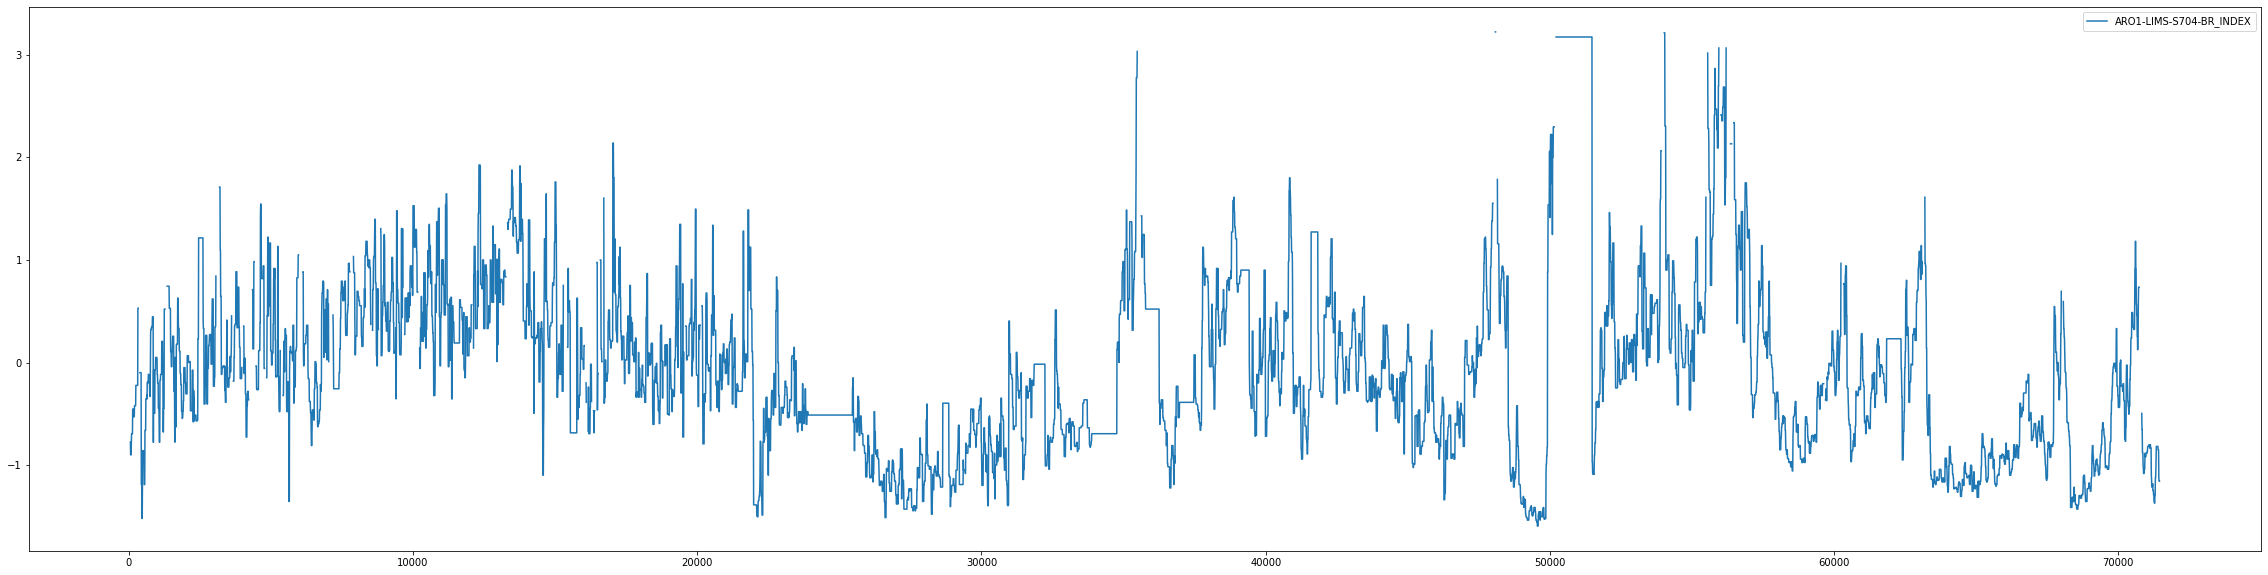

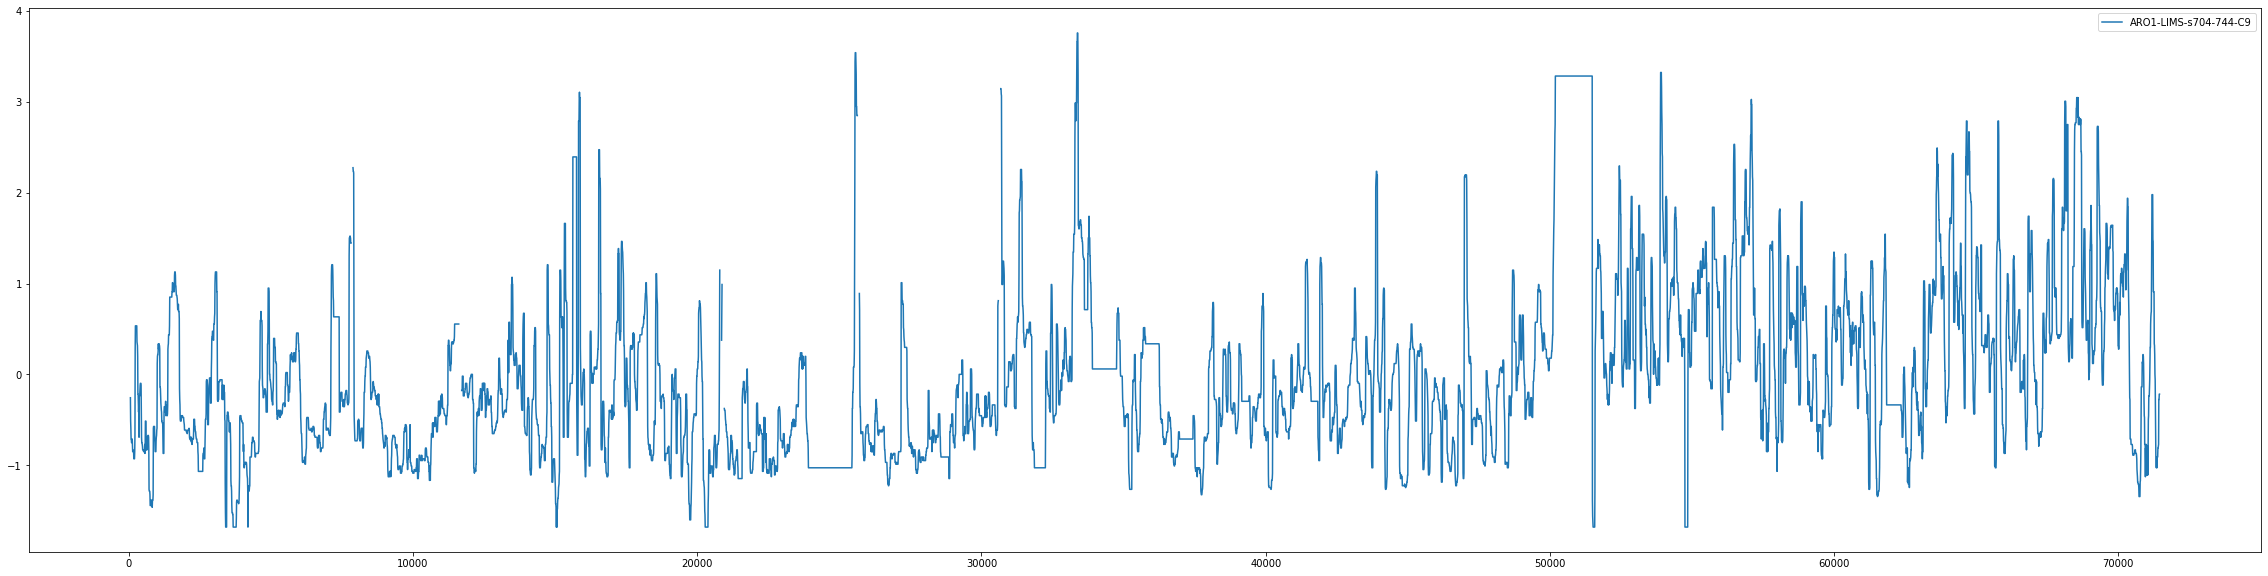

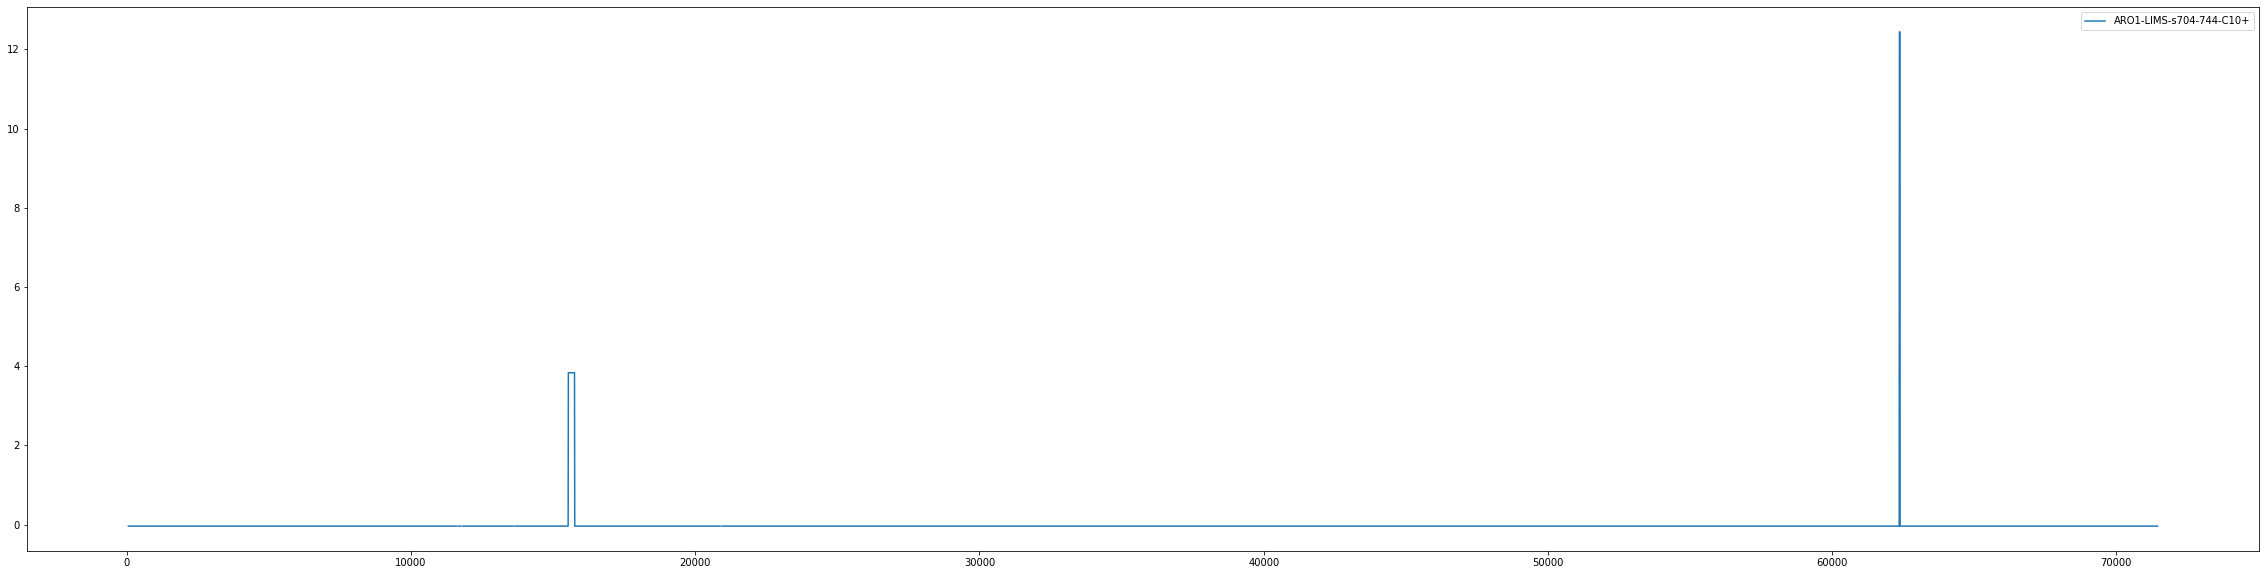

In [141]:
ss = StandardScaler()
ARO1_1_df[:] = ss.fit_transform(ARO1_1_df)
ARO1_1_df.corr()

n = 7
for i in ARO1_1_df.columns:
  fig = plt.figure(figsize=(40,10))
  plt.plot(ARO1_1_df[i].rolling(n).median(),label=i)
  plt.legend()
  plt.show()

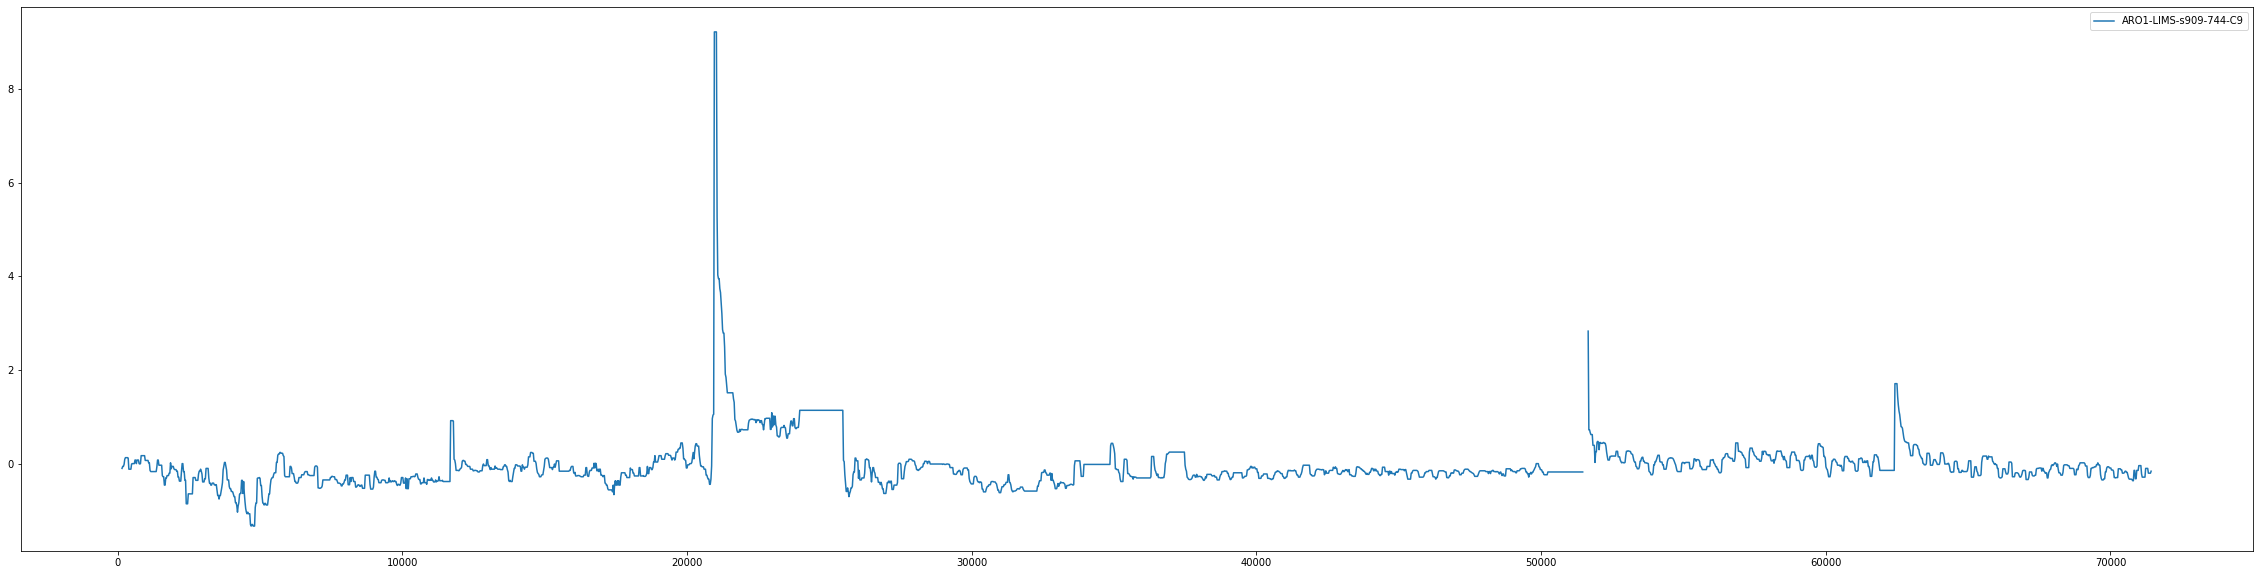

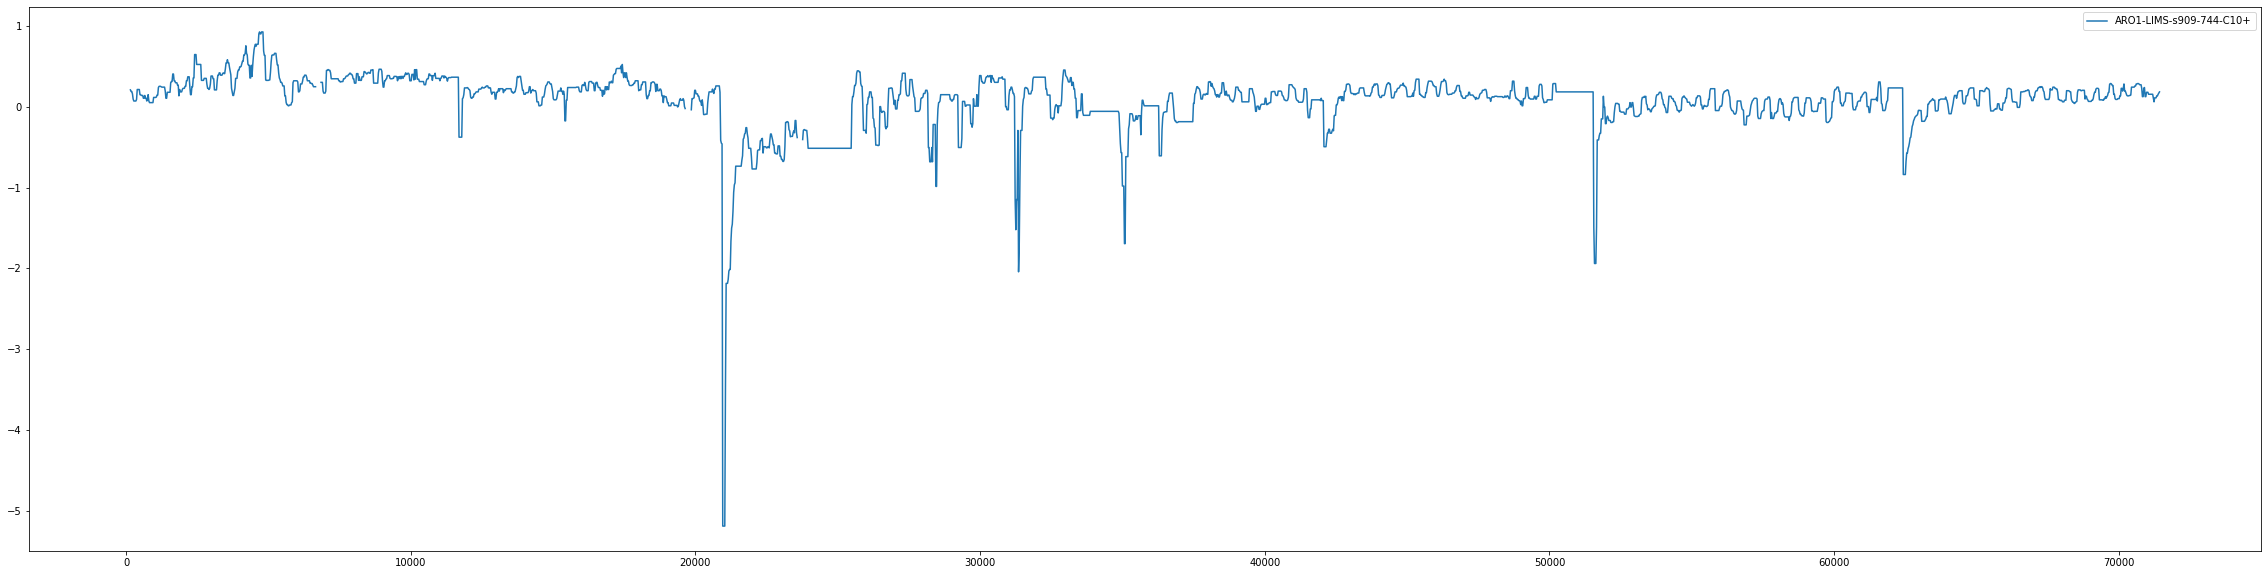

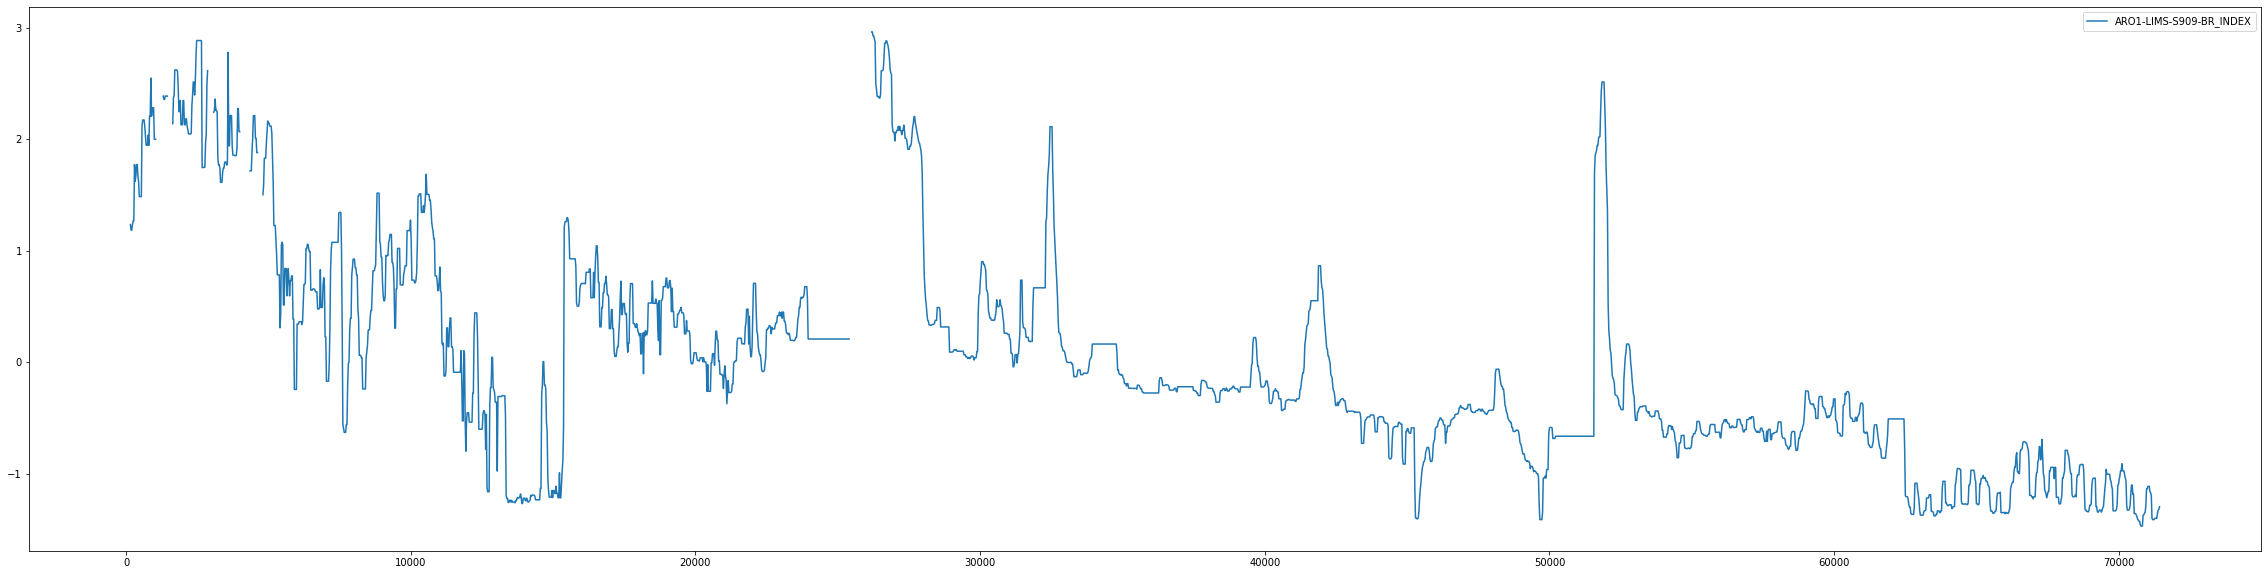

In [142]:
ss = StandardScaler()
ARO1_2_df[:] = ss.fit_transform(ARO1_2_df)
ARO1_2_df.corr()

n = 7
for i in ARO1_2_df.columns:
  fig = plt.figure(figsize=(40,10))
  plt.plot(ARO1_2_df[i].rolling(n).median(),label=i)
  plt.legend()
  plt.show()

In [138]:
ARO1_1_df = ARO1_df[7::8]
ARO1_1_df = ARO1_1_df[ARO1_cols[:3]]
ARO1_2_df = ARO1_df[7::24]
ARO1_2_df = ARO1_2_df[ARO1_cols[3:]]

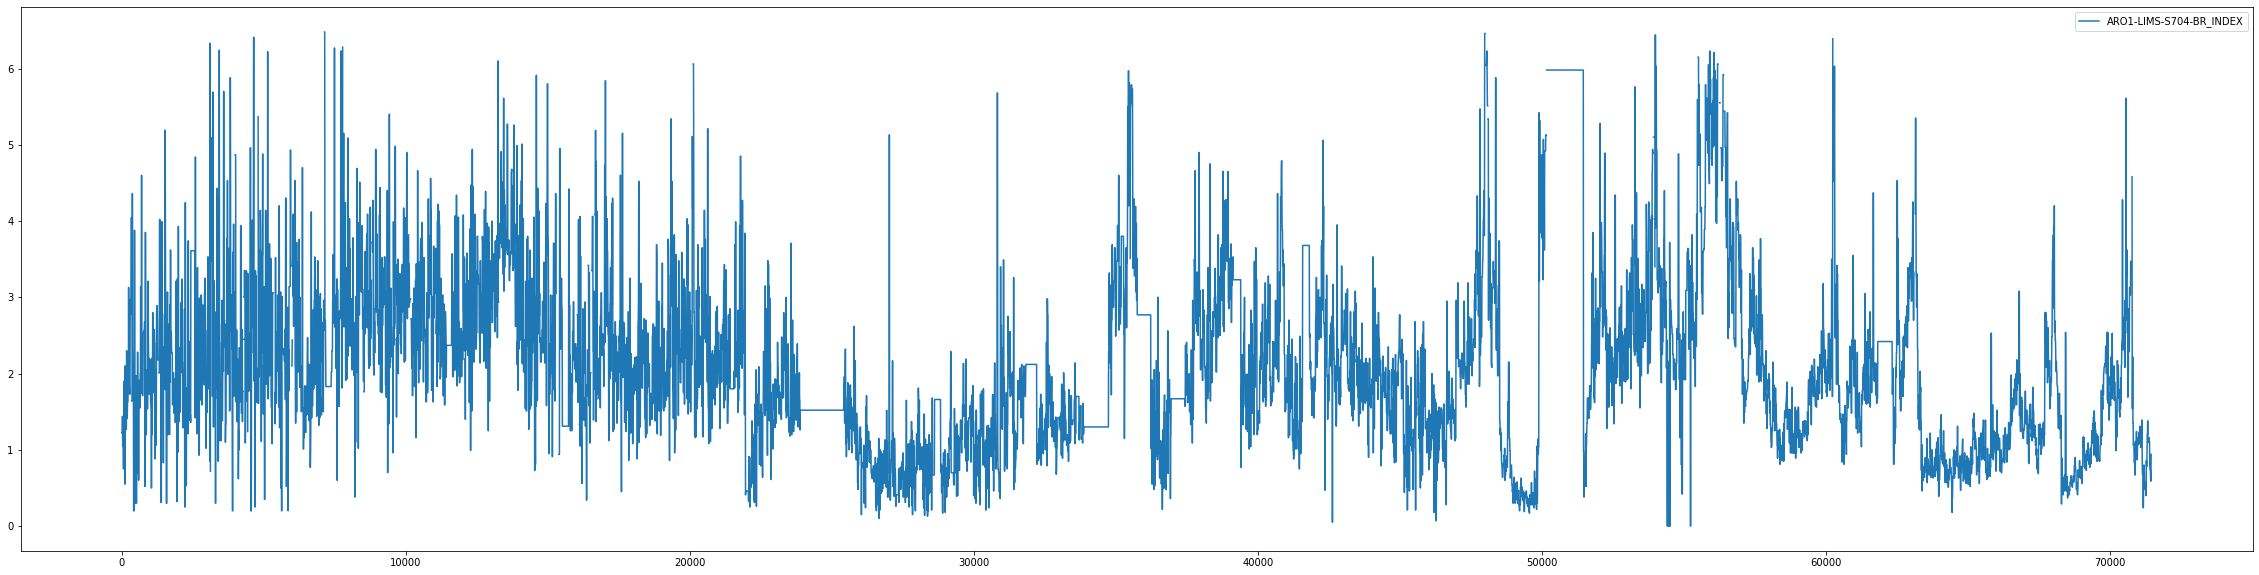

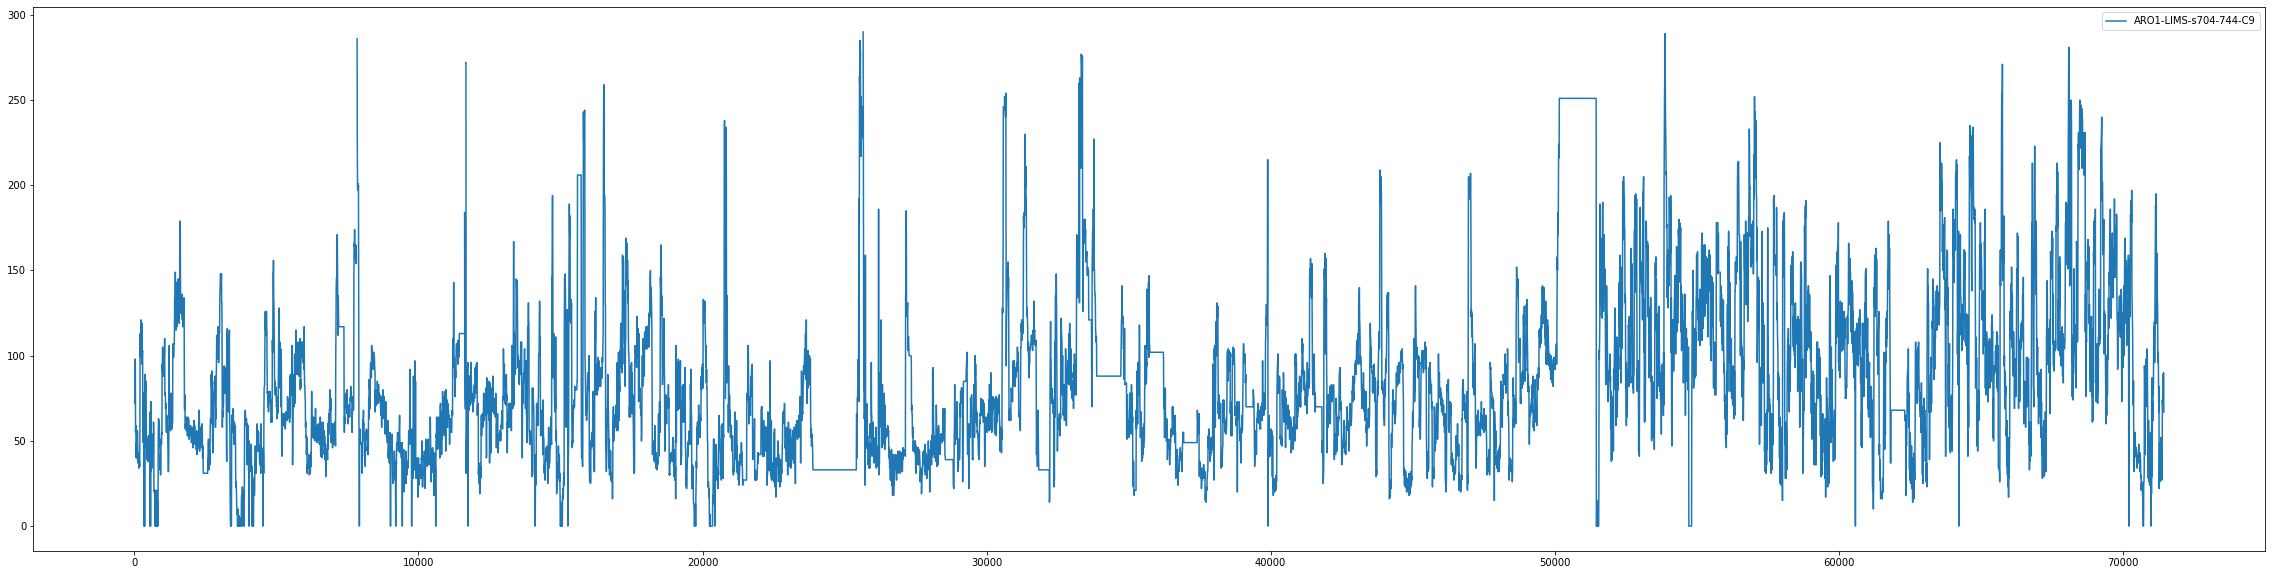

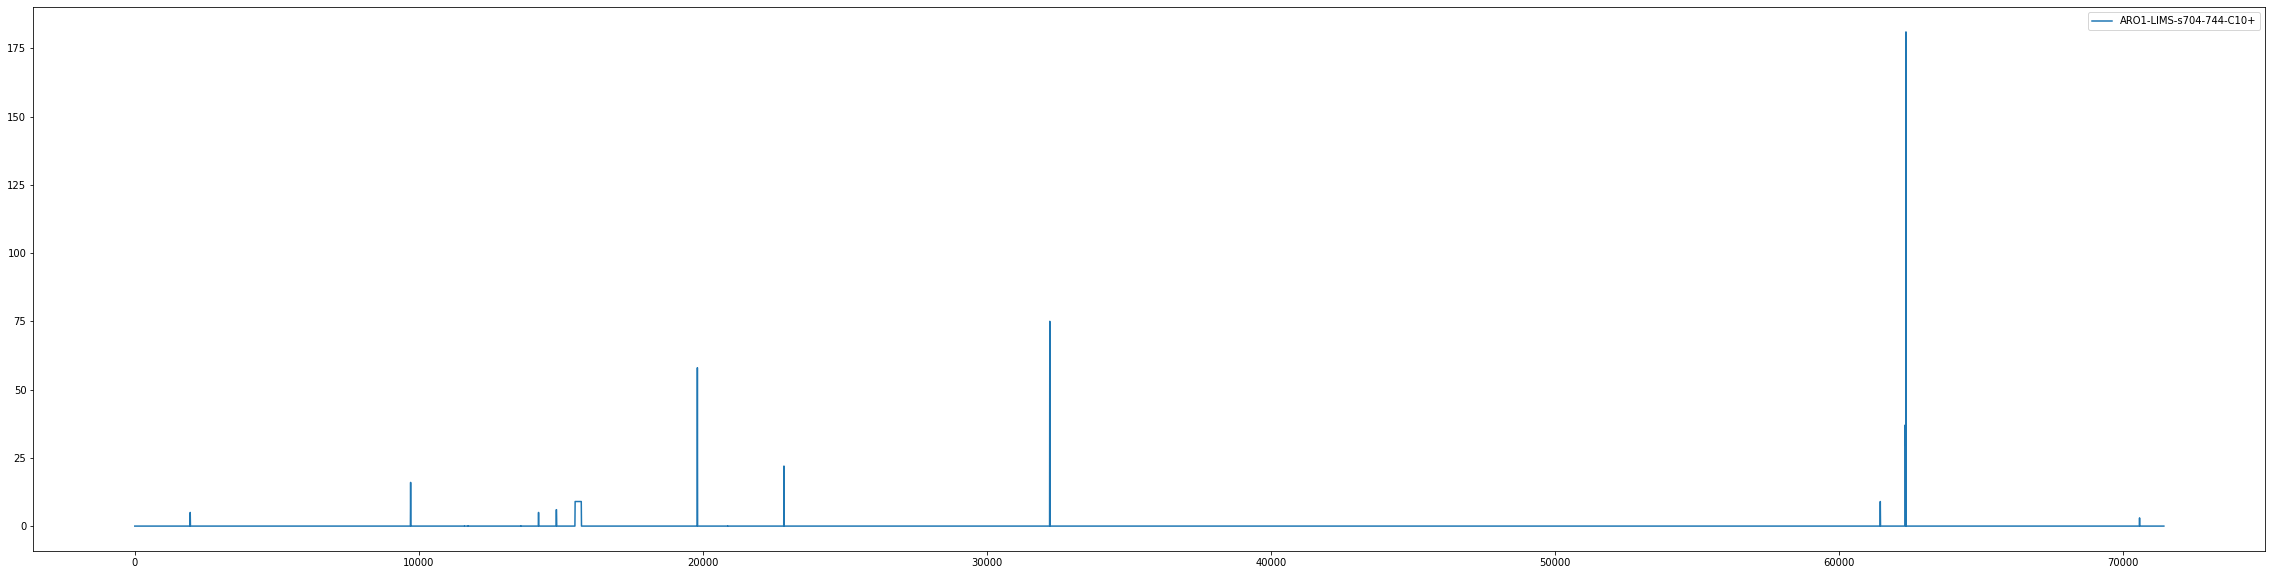

In [139]:
for i in ARO1_1_df.columns:
  fig = plt.figure(figsize=(40,10))
  plt.plot(ARO1_1_df[i], label = i)
  plt.legend()
  plt.show()

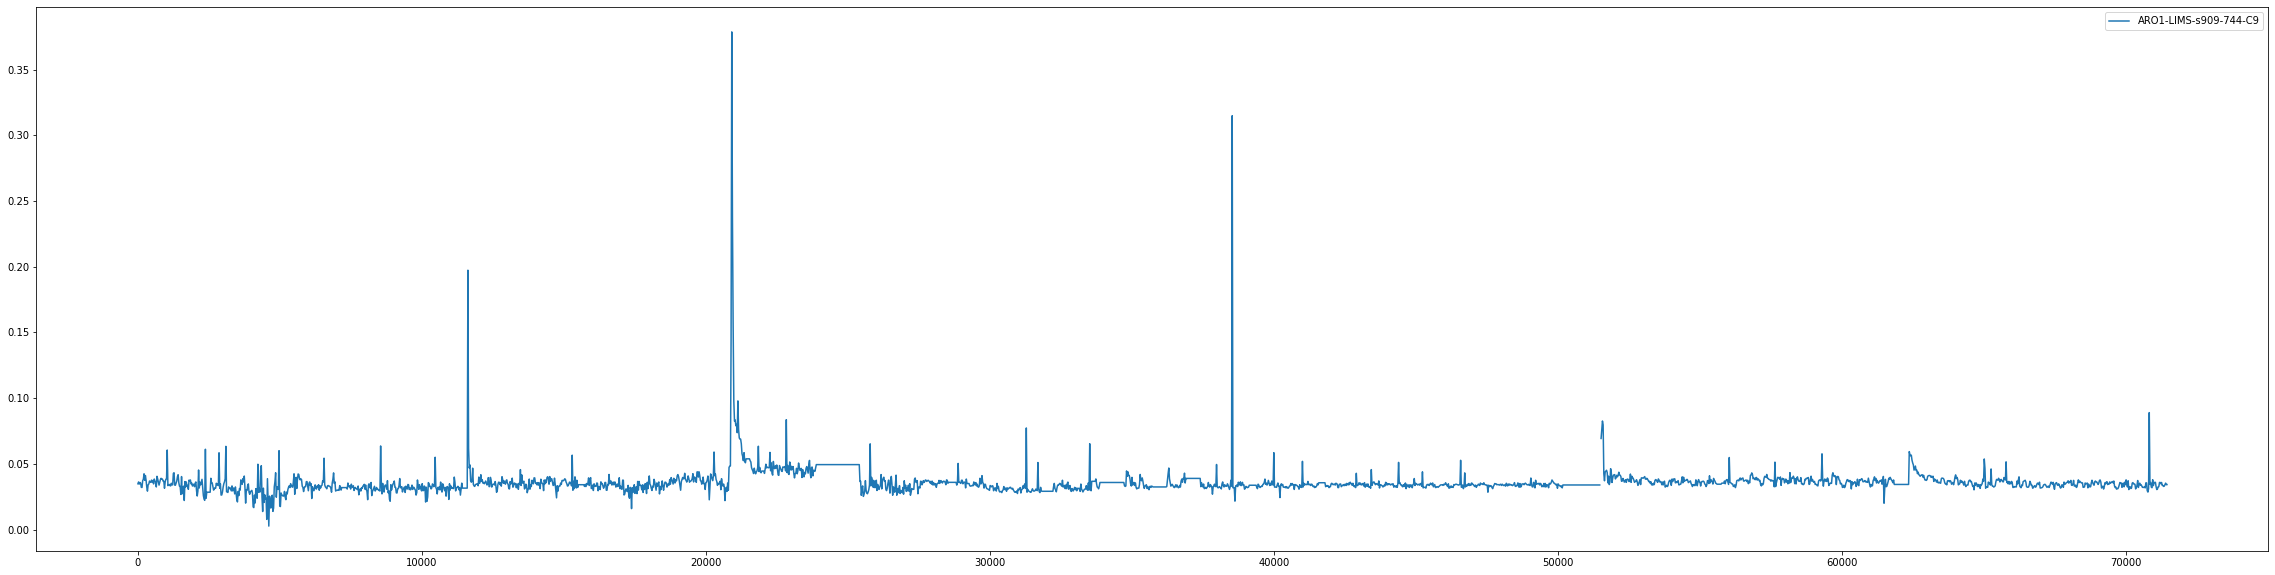

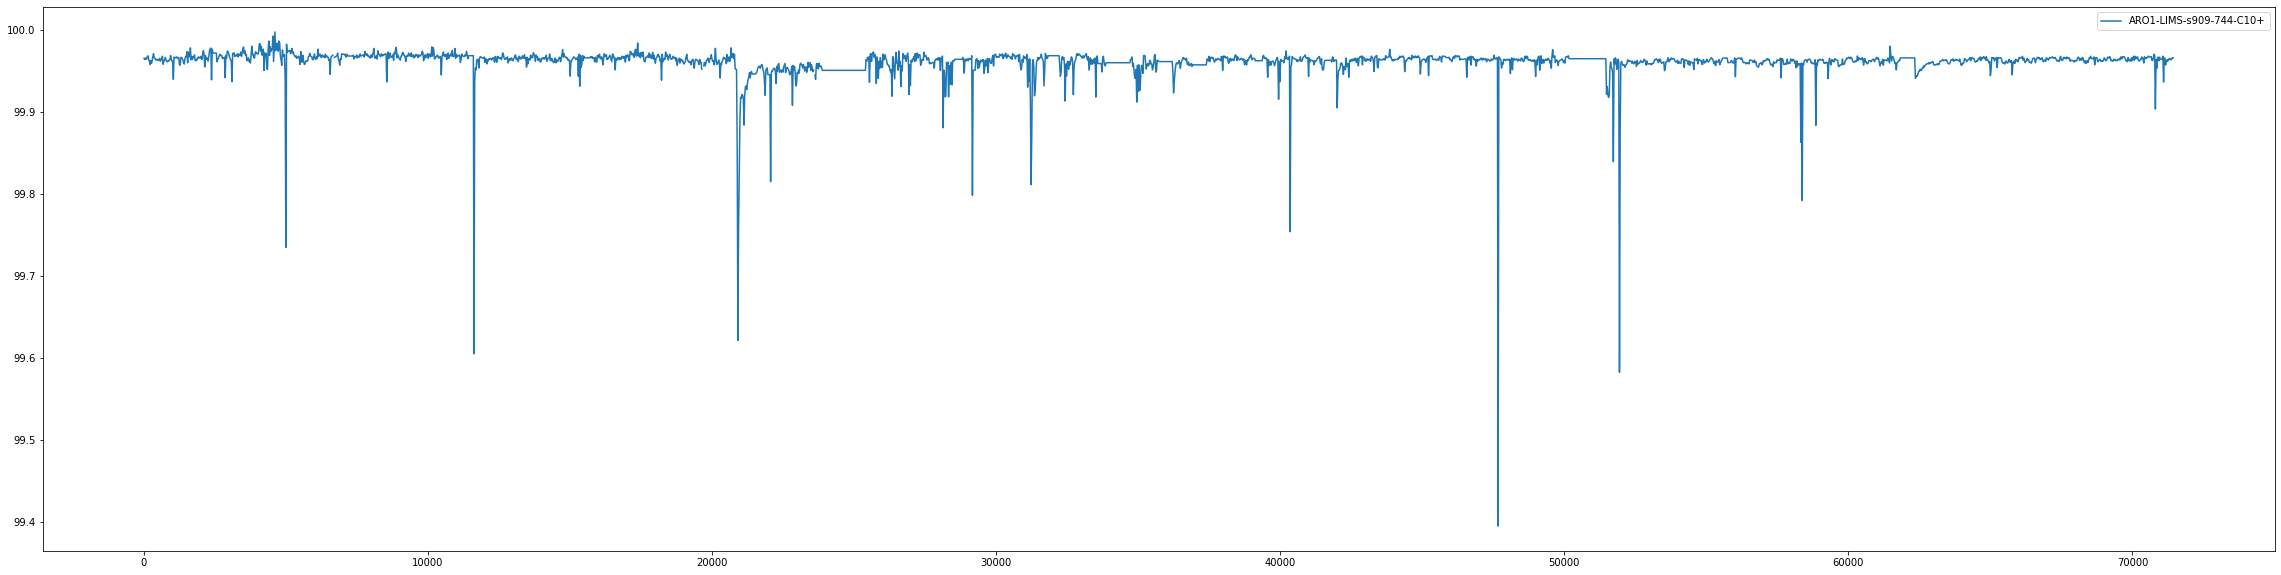

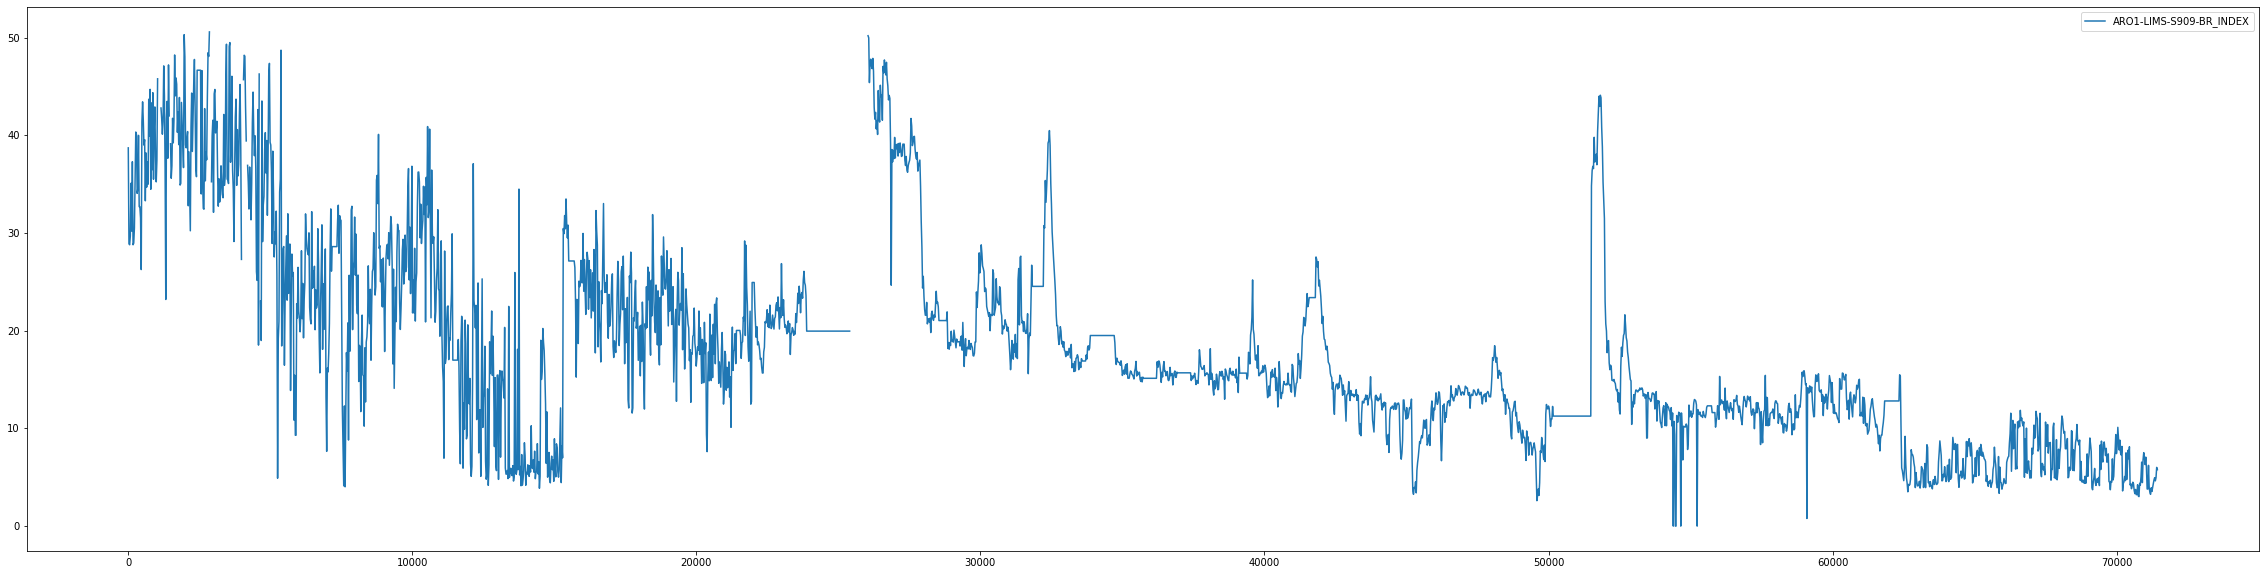

In [140]:
for i in ARO1_2_df.columns:
  fig = plt.figure(figsize=(40,10))
  plt.plot(ARO1_2_df[i], label = i)
  plt.legend()
  plt.show()

In [143]:
ARO2_df = pd.read_excel('data/ADS47/R911R912 _明志蔡教授_R4-ARO2.xlsx', sheet_name='R911R912_TAG相關錶點資料(X)')

ARO2_cols = [
             #"date",
             'ARO2-LIMS-S708@Br.Index',
             'ARO2-LIMS-S708@A9',
             'ARO2-LIMS-S708@A10+',
             'ARO2-LIMS-s919@A9',
             'ARO2-LIMS-s919@A10+',
             'ARO2-LIMS-s919@Br.Index',
             ]

#ARO2_df.columns.values[0] = "date"

ARO2_df = ARO2_df.loc[:,ARO2_cols]
for i in ARO2_df.columns:
     ARO2_df[i] = pd.to_numeric(ARO2_df[i],errors='coerce')
     ARO2_df[i] = remove_outlier(df = ARO2_df, column = i)


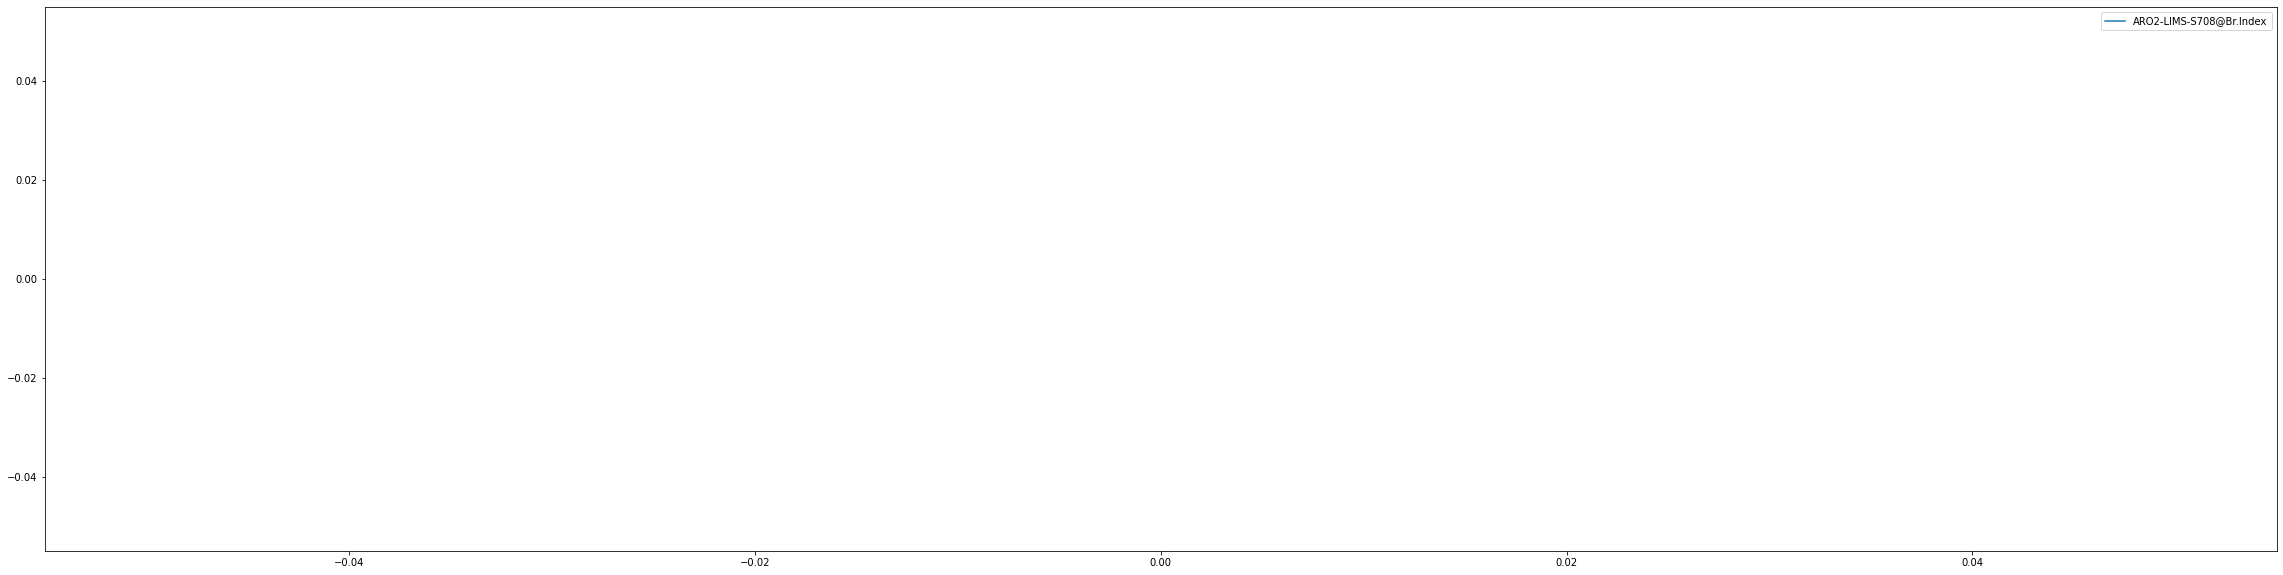

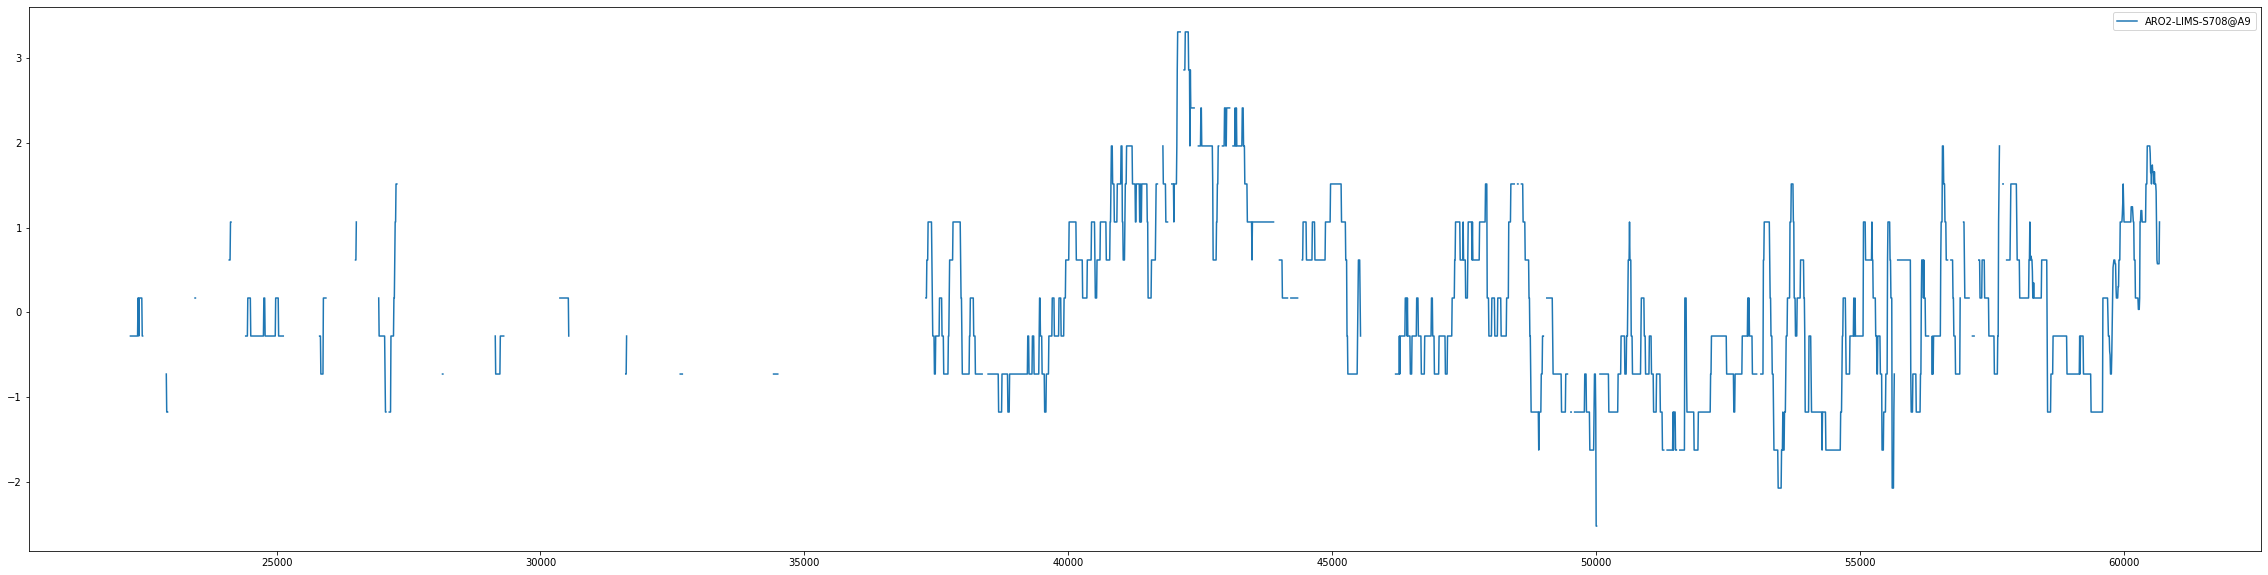

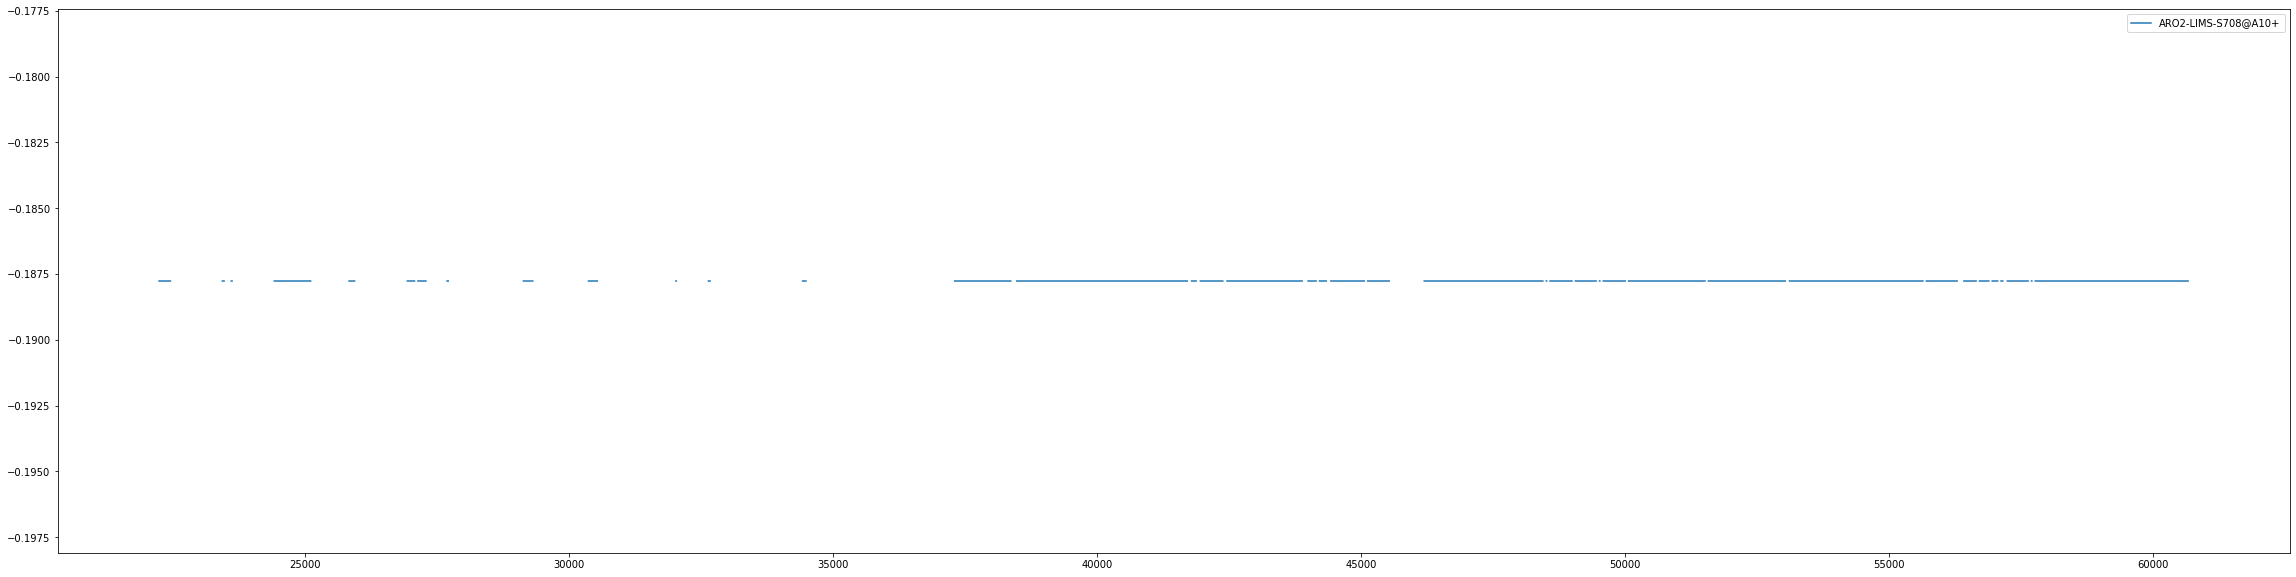

In [147]:
ss = StandardScaler()
ARO2_1_df[:] = ss.fit_transform(ARO2_1_df)
ARO2_1_df.corr()

n = 7
for i in ARO2_1_df.columns:
  fig = plt.figure(figsize=(40,10))
  plt.plot(ARO2_1_df[i].rolling(n).median(),label=i)
  plt.legend()
  plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:985: RuntimeWarning: invalid value encountered in true_divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:990: RuntimeWarning: invalid value encountered in true_divide
  T = new_sum / new_sample_count
/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:1020: RuntimeWarning: invalid value encountered in true_divide
  new_unnormalized_variance -= correction ** 2 / new_sample_count


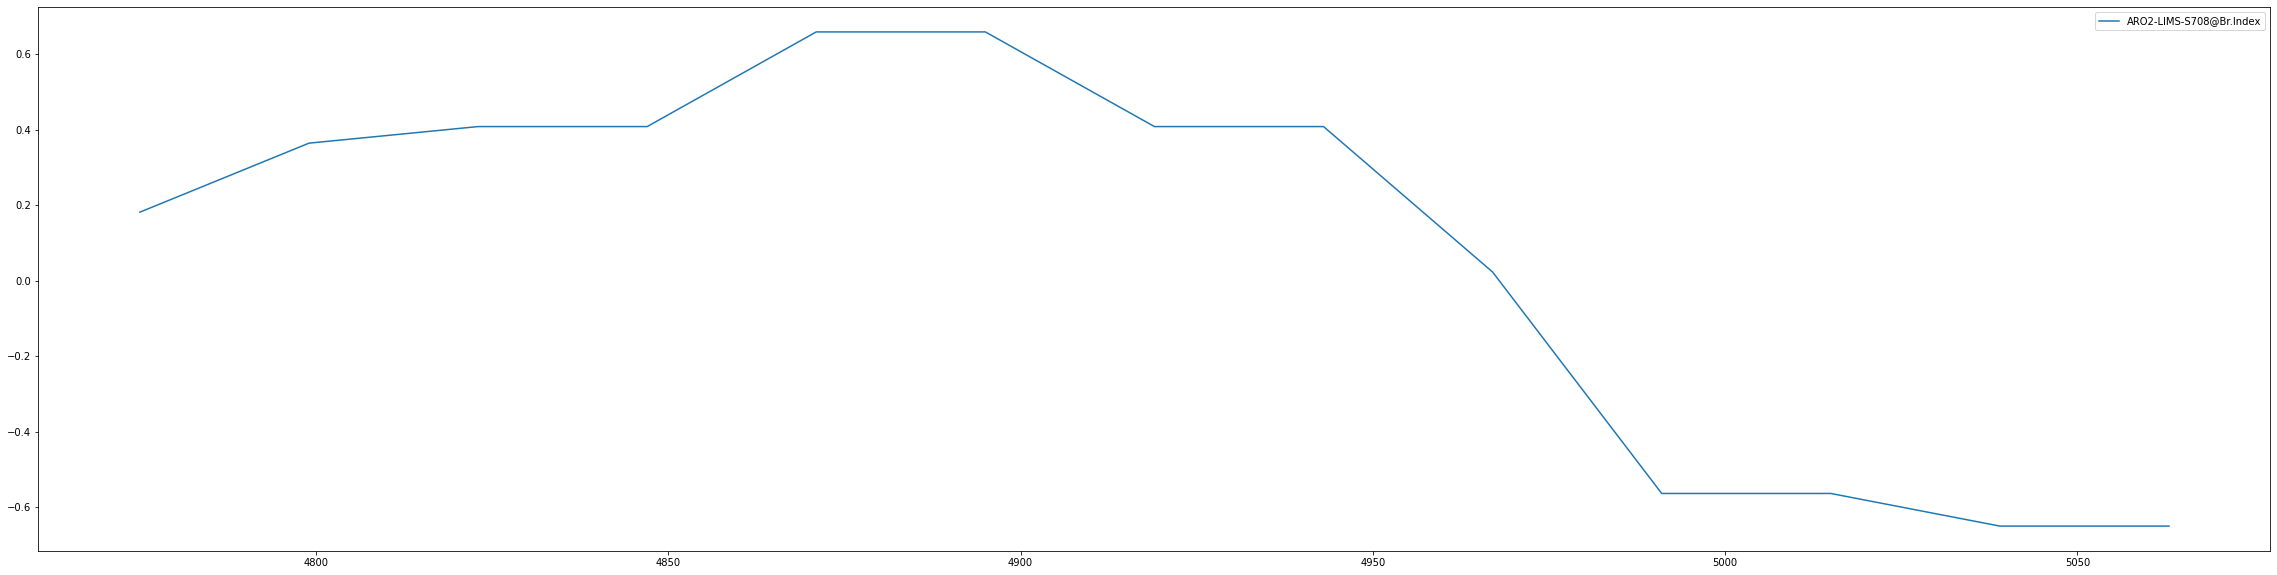

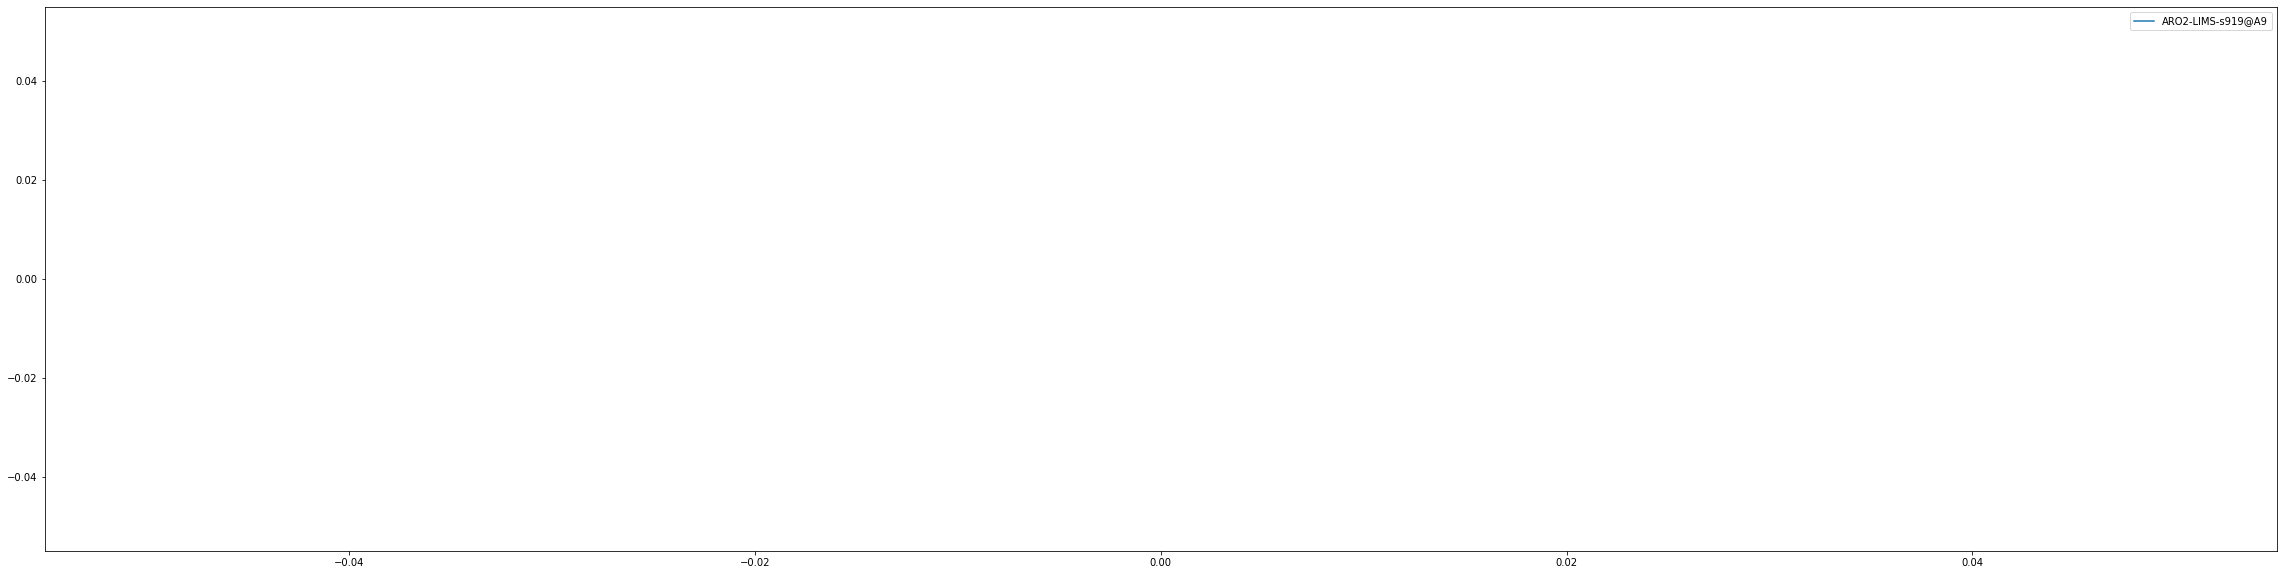

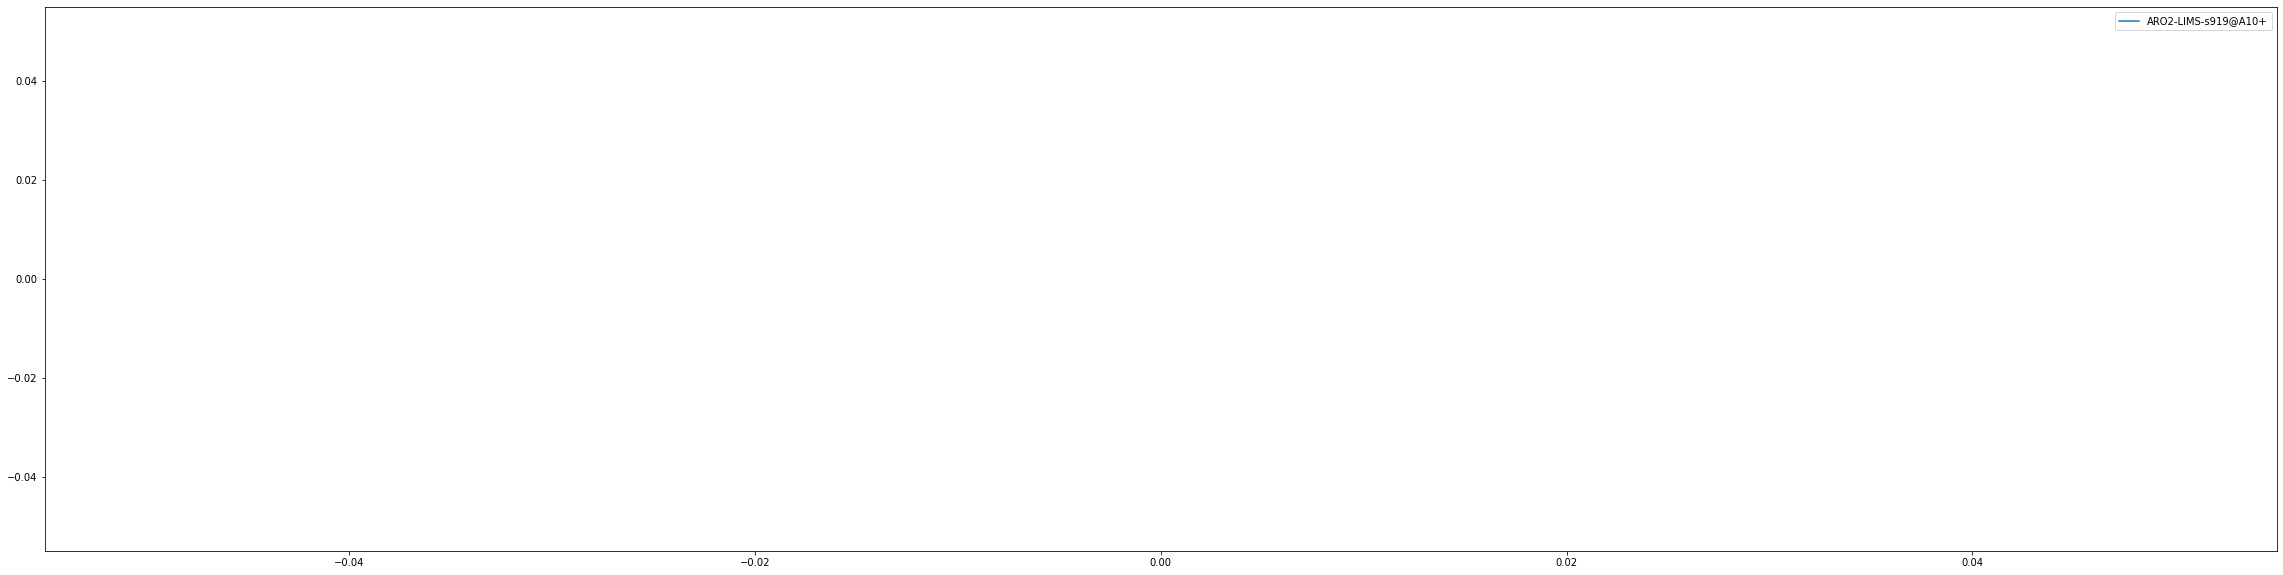

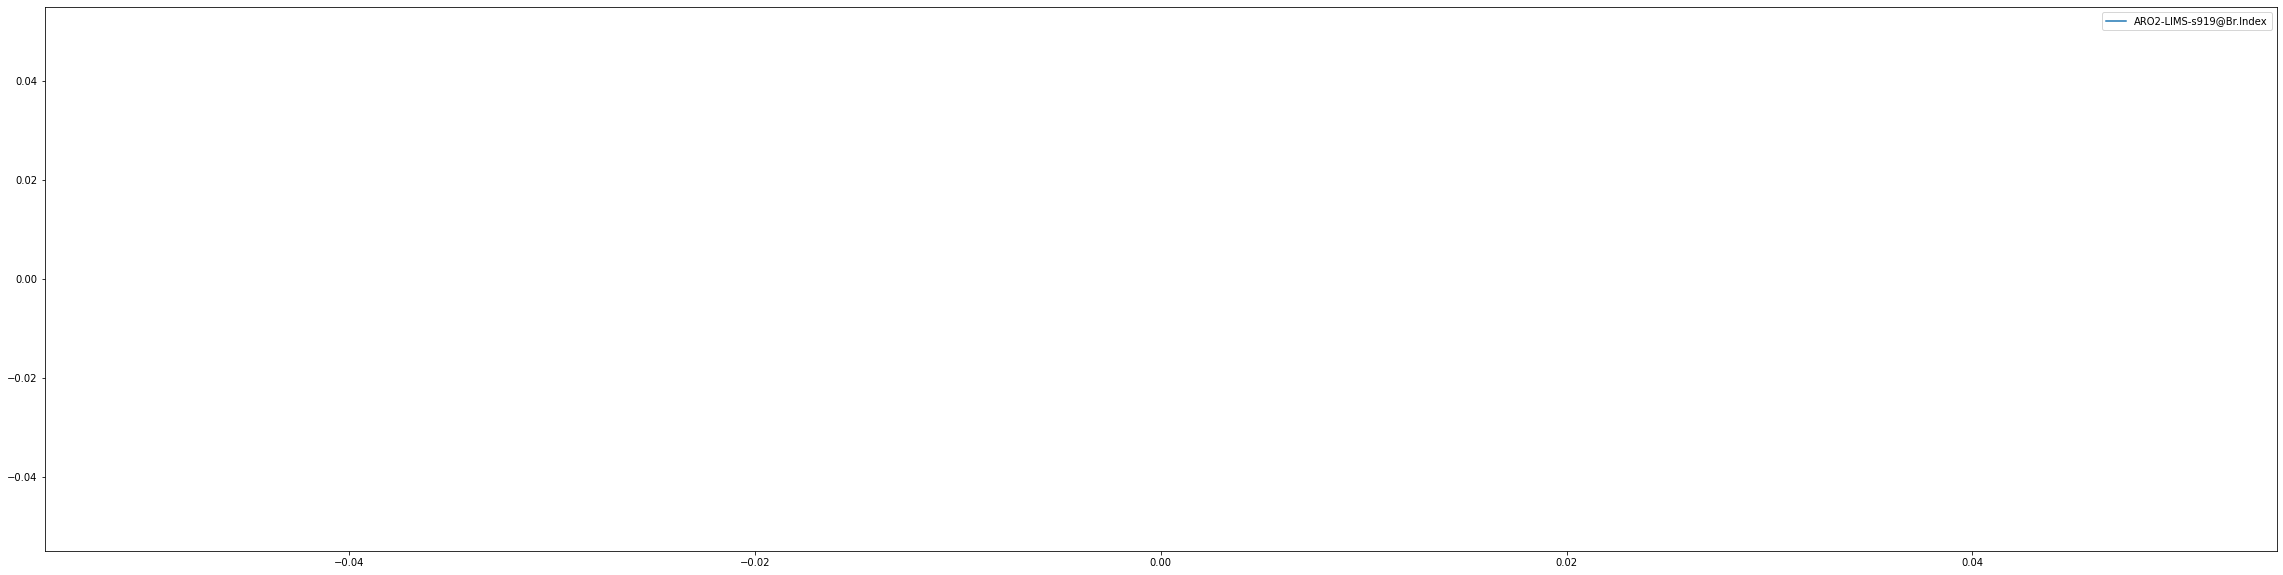

In [148]:
ss = StandardScaler()
ARO2_2_df[:] = ss.fit_transform(ARO2_2_df)
ARO2_2_df.corr()

n = 7
for i in ARO2_2_df.columns:
  fig = plt.figure(figsize=(40,10))
  plt.plot(ARO2_2_df[i].rolling(n).median(),label=i)
  plt.legend()
  plt.show()

In [144]:
ARO2_df = ARO2_df.iloc[4623:,:]
ARO2_1_df = ARO2_df[ARO2_cols[0:3]][0::8]
ARO2_2_df = ARO2_df[["ARO2-LIMS-S708@Br.Index", 'ARO2-LIMS-s919@A9', 'ARO2-LIMS-s919@A10+', 'ARO2-LIMS-s919@Br.Index']][8::24]

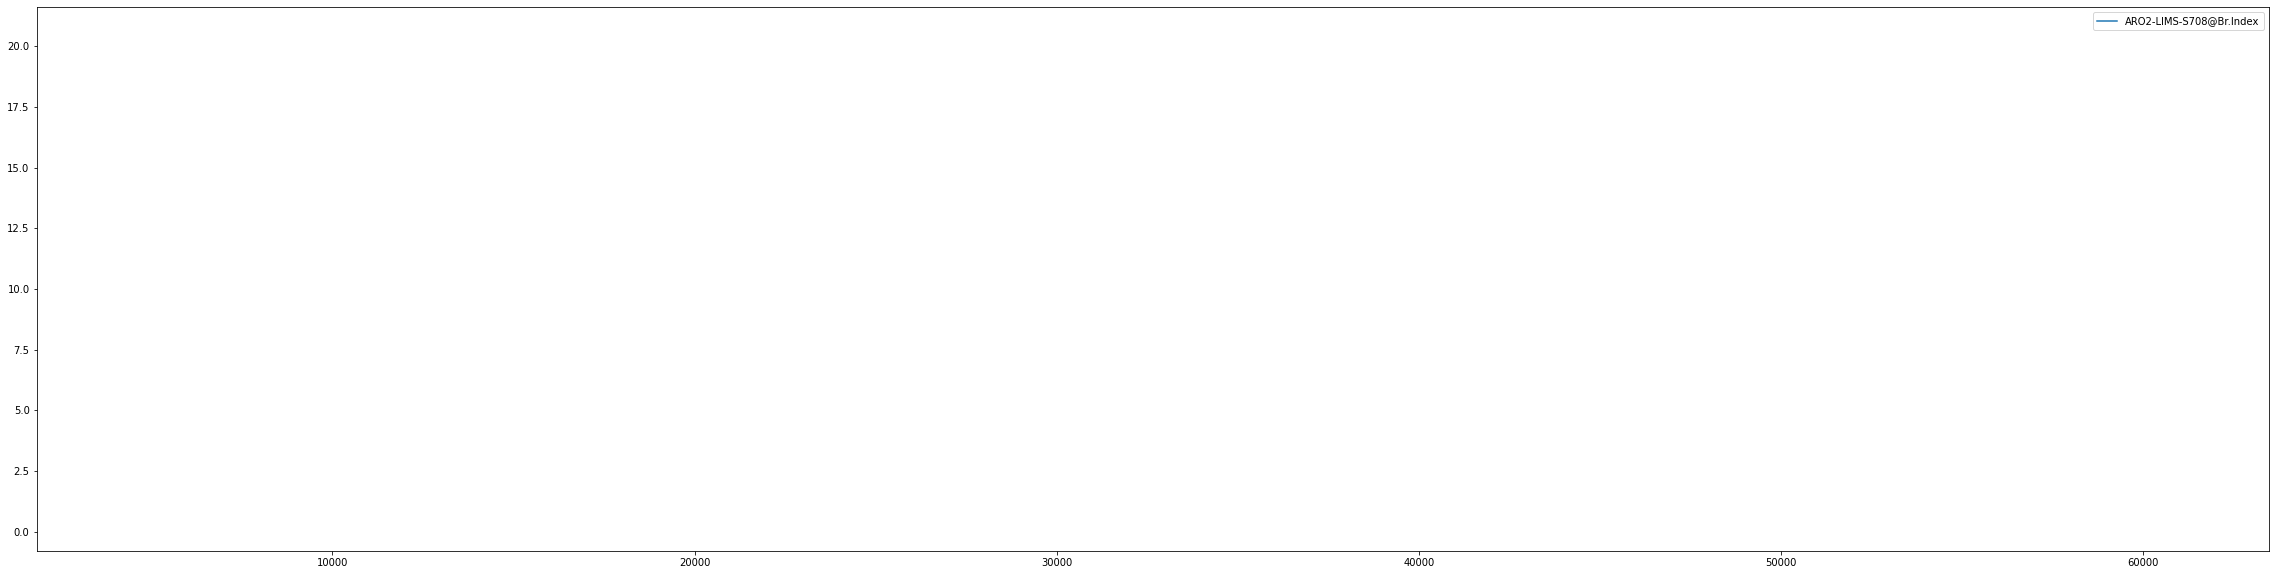

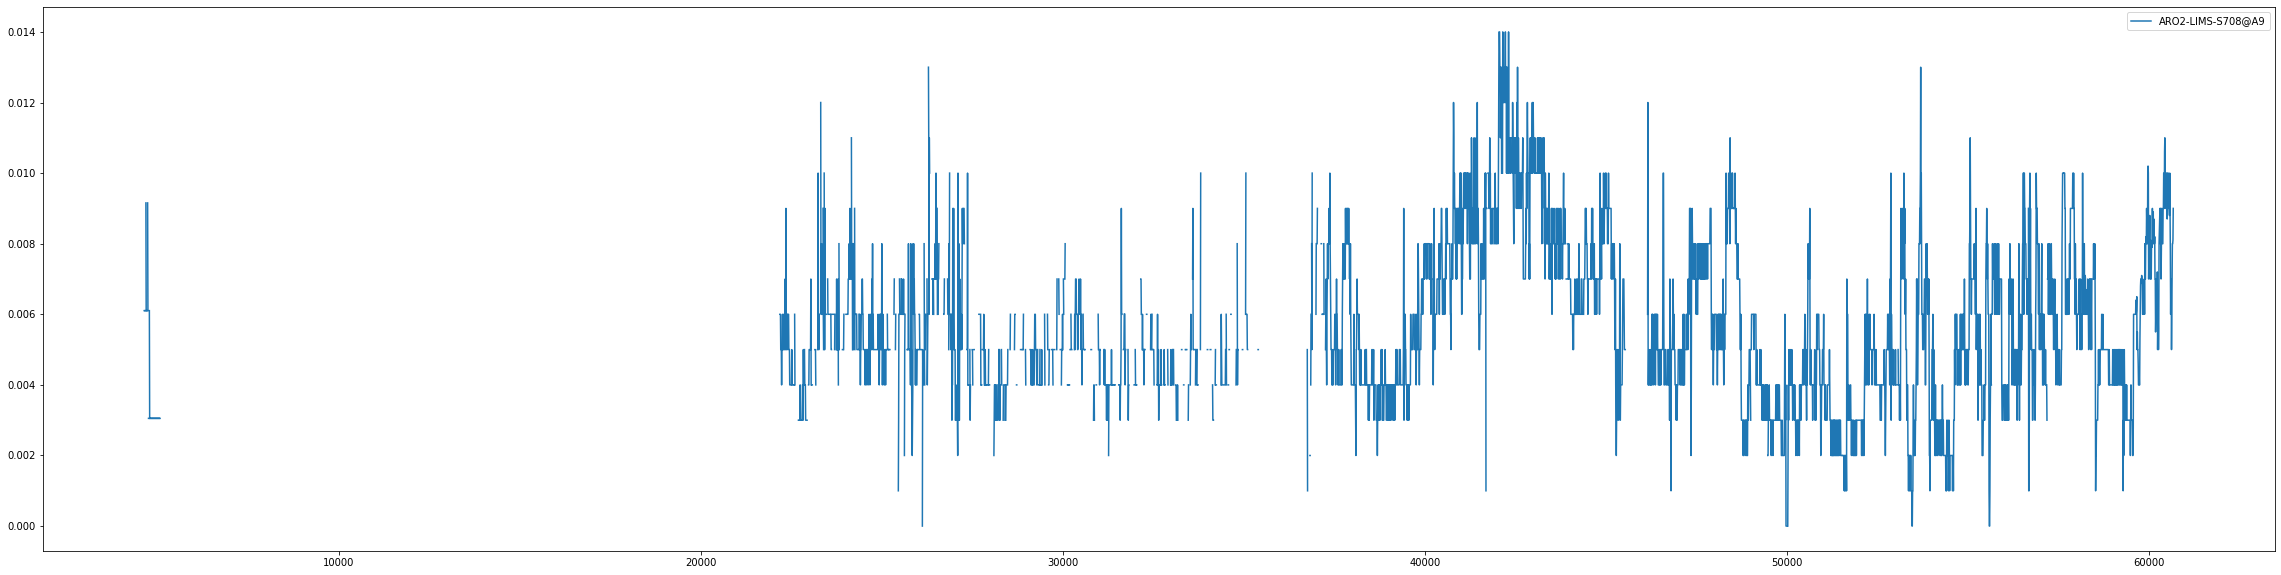

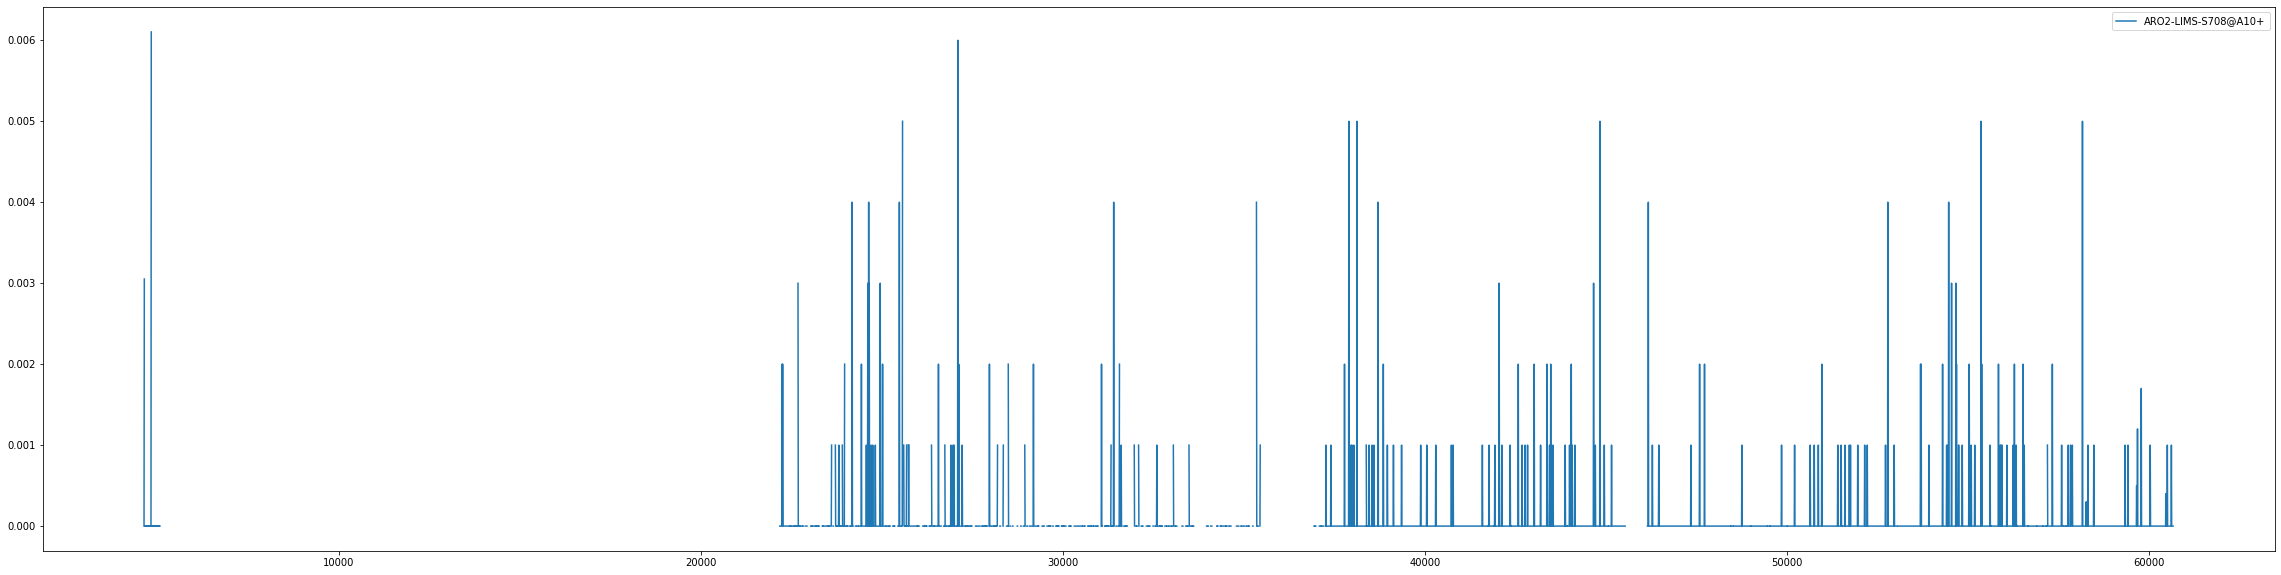

In [145]:
for i in ARO2_1_df.columns:
  fig = plt.figure(figsize=(40,10))
  plt.plot(ARO2_1_df[i], label = i)
  plt.legend()
  plt.show()

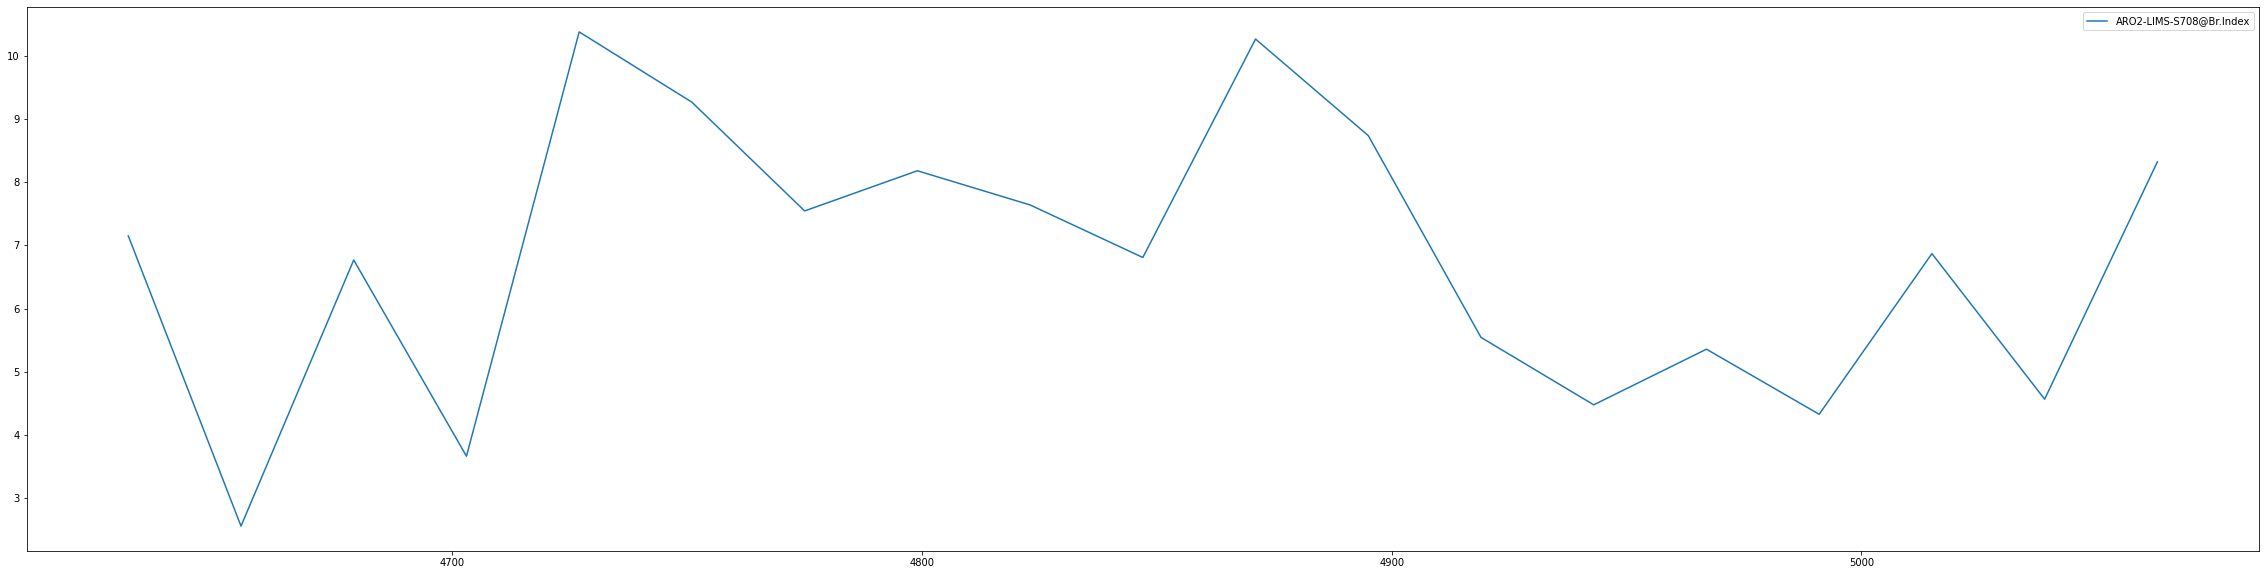

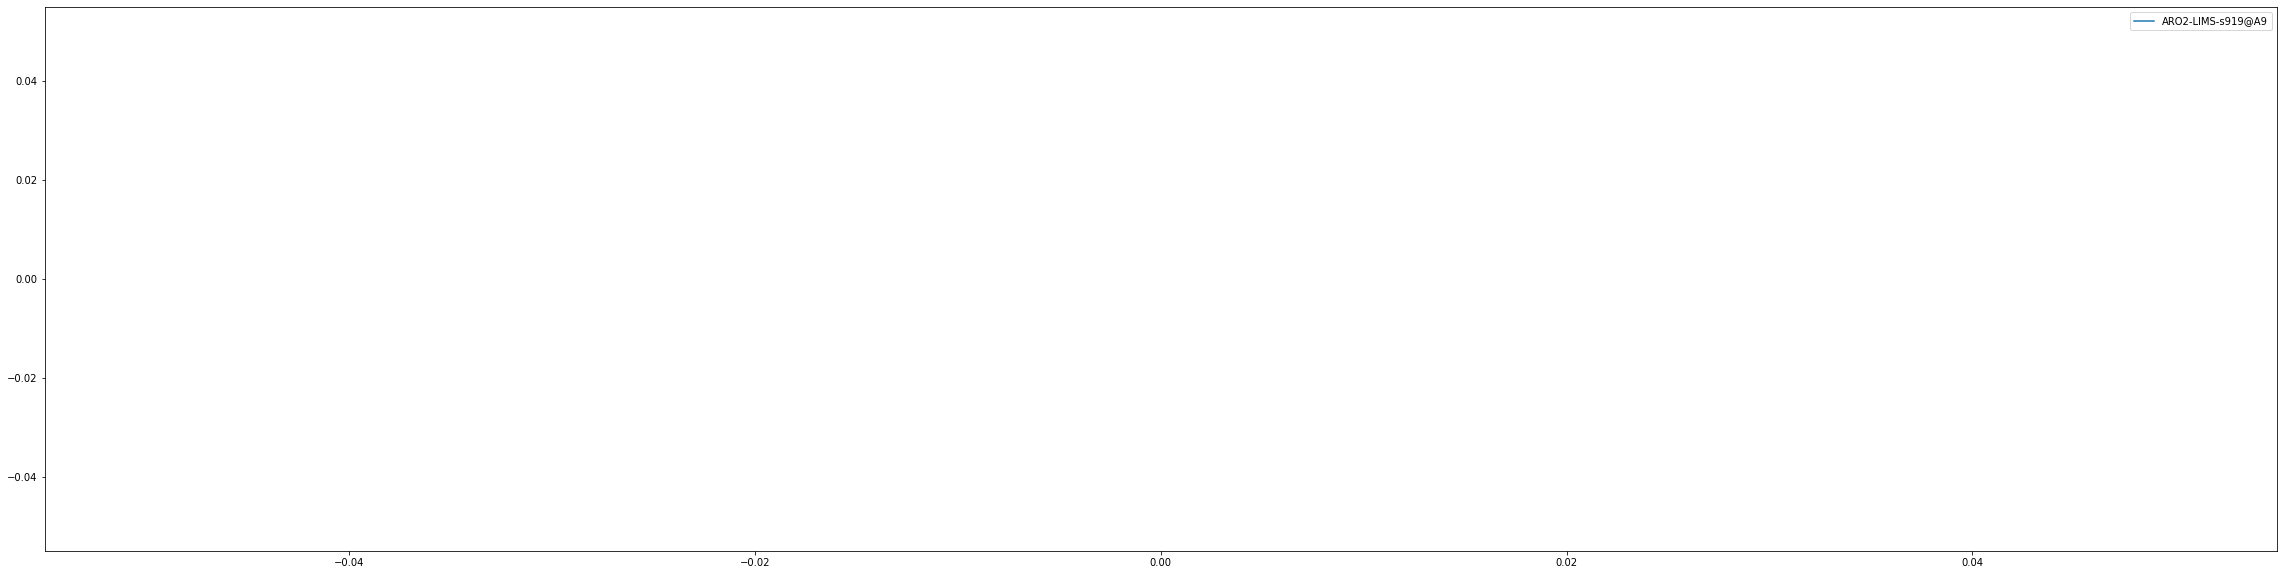

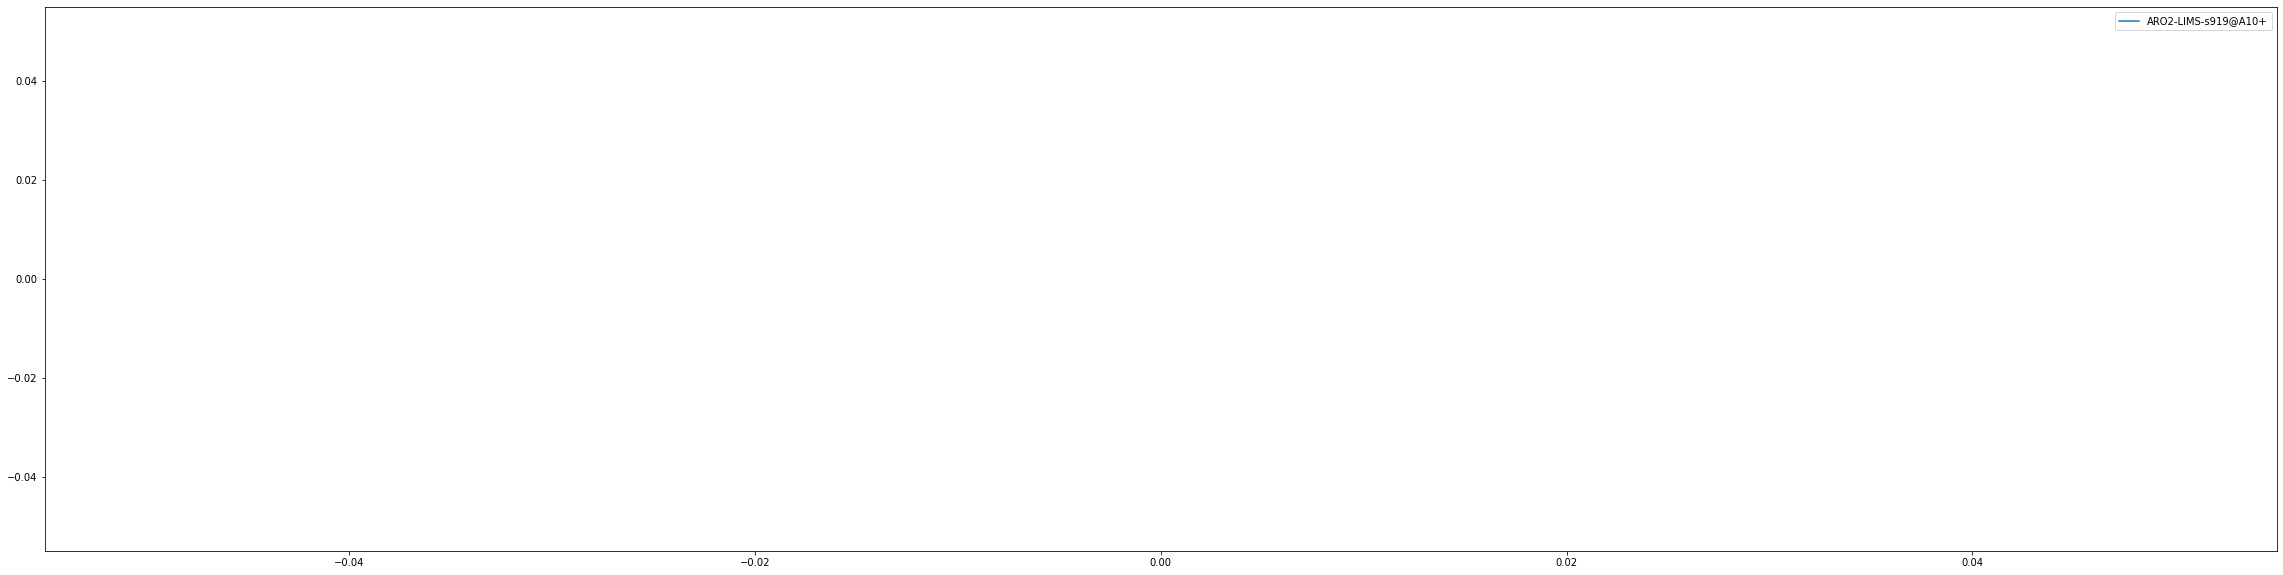

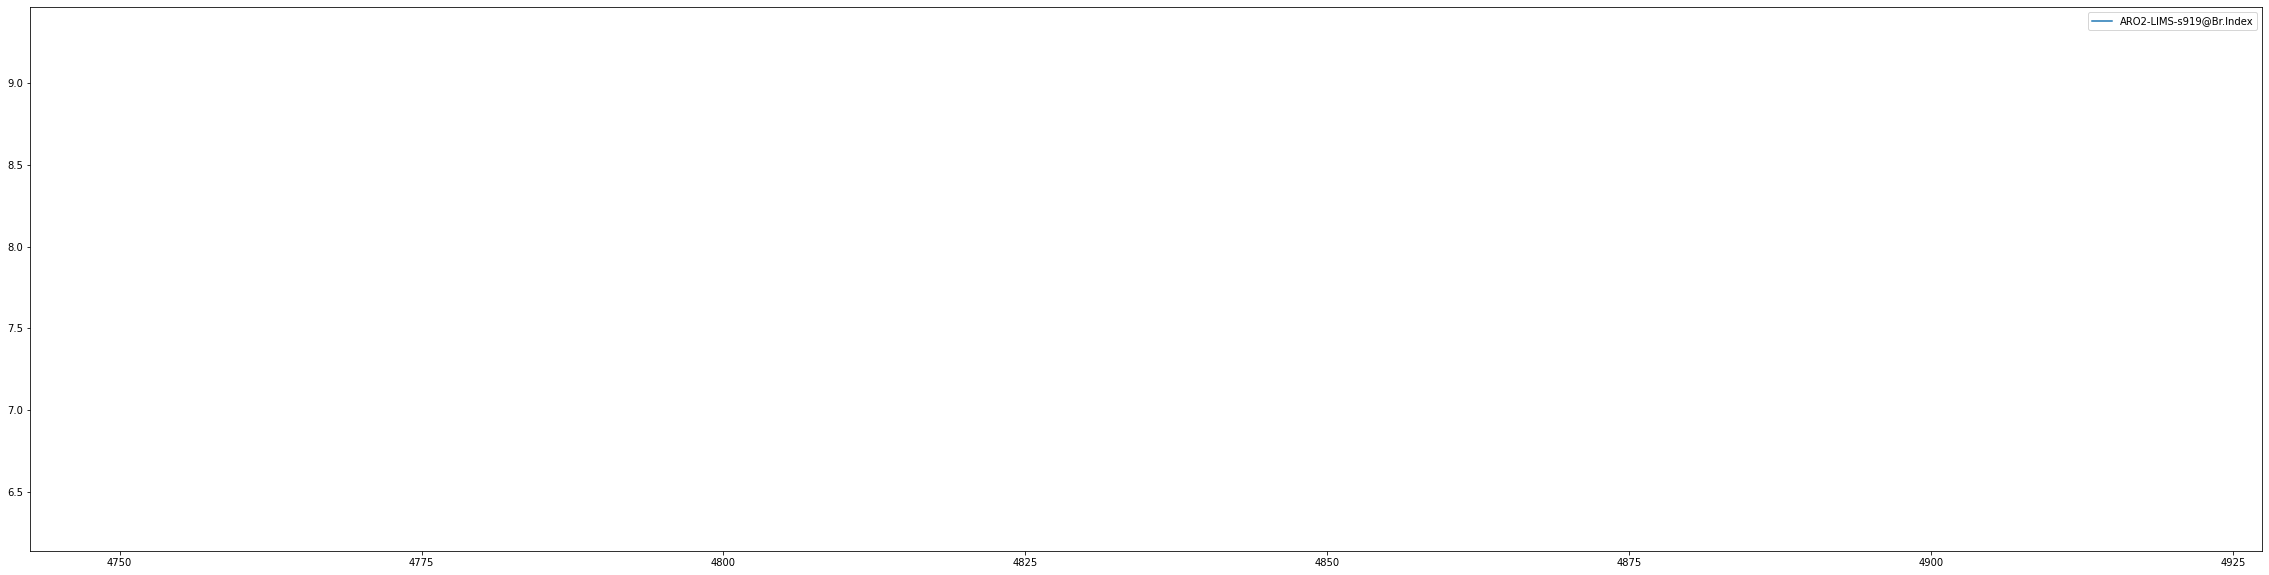

In [146]:
for i in ARO2_2_df.columns:
  fig = plt.figure(figsize=(40,10))
  plt.plot(ARO2_2_df[i], label = i)
  plt.legend()
  plt.show()